In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import csv datas 
data1_castelmassa = pd.read_csv('Castelmassa.csv',sep=';',low_memory=False)
#Remove undesired columns
data1_castelmassa.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data1_castelmassa.rename(columns={'Castelmassa SIAP - Livello Idrometrico - 15968 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN


In [70]:
(data1_castelmassa)

Orario Level Variazione  Valore assoluto
0       2008-01-01 00:00  5.91        NaN             5.91
1       2008-01-01 01:00  5.91       0.00             5.91
2       2008-01-01 02:00  5.91       0.00             5.91
3       2008-01-01 03:00  5.91       0.00             5.91
4       2008-01-01 04:00  5.91       0.00             5.91
...                  ...   ...        ...              ...
134371  2023-04-30 19:00  4.88       0.01             4.88
134372  2023-04-30 20:00  4.88       0.00             4.88
134373  2023-04-30 21:00  4.88       0.00             4.88
134374  2023-04-30 22:00  4.88       0.00             4.88
134375  2023-04-30 23:00  4.88       0.00             4.88

[134376 rows x 4 columns]

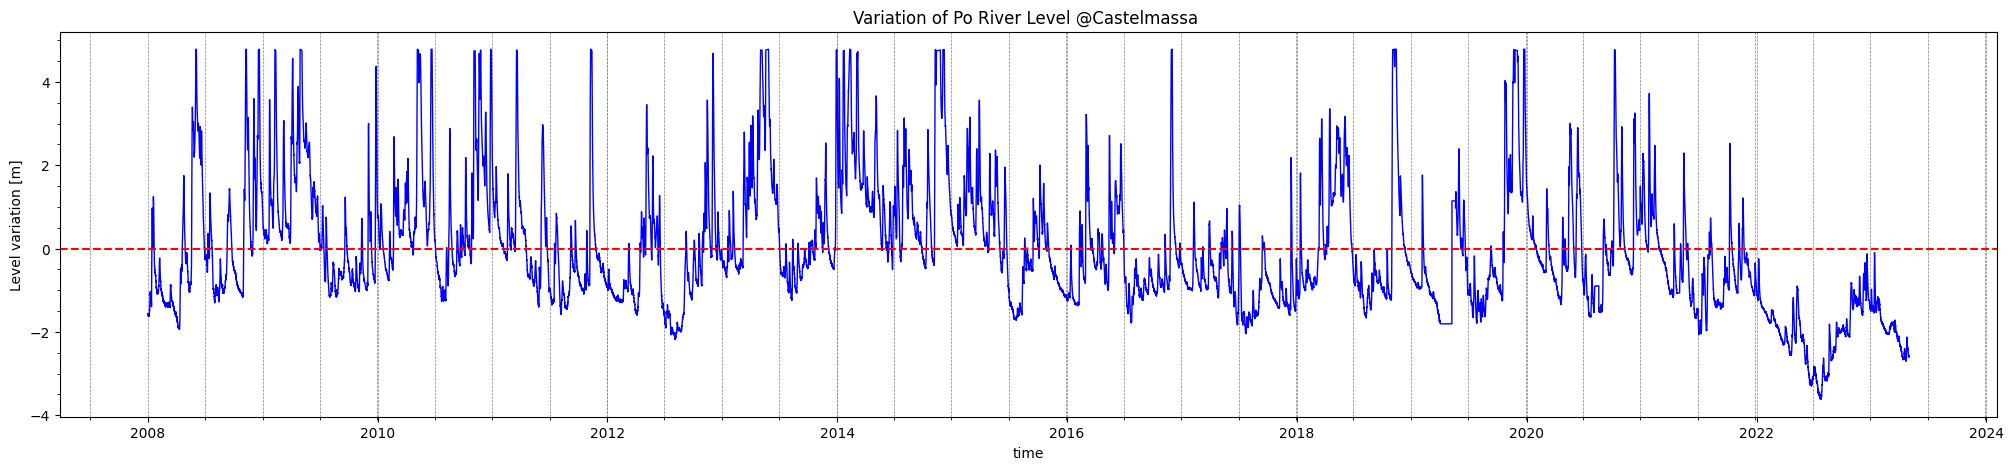

In [71]:
data1_castelmassa.dropna(inplace=True)
data1_castelmassa = data1_castelmassa.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data1_castelmassa.describe()
#In case it gives error because of non numerical data
data1_castelmassa['Level'] = pd.to_numeric(data1_castelmassa['Level'], errors='coerce')
#Remove outliers
mean=np.mean(data1_castelmassa['Level'])
sigma = np.std(data1_castelmassa['Level'])

#Remove rows with z-score greater than 3
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']< mean+3*sigma]
#2121 vales are removed for castelmassa (original 131301)
#Now for smaller extremes
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']> mean-3*sigma]
#no extremes removed for castelmassa

#Obtain the delta Level-Mean
data1_castelmassa['Delta'] = data1_castelmassa['Level']-mean
De=data1_castelmassa['Delta']
De = De.reset_index(drop=True)

#Rename the time
data1_castelmassa['Orario'] = pd.to_datetime(data1_castelmassa['Orario'])
# Add a new column with the year extracted from the 'date' column
data1_castelmassa['Year'] = data1_castelmassa['Orario'].dt.year

#Plot result

plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Castelmassa ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


In [72]:
data1_castelmassa['month'] = [i.month for i in data1_castelmassa['Orario']]

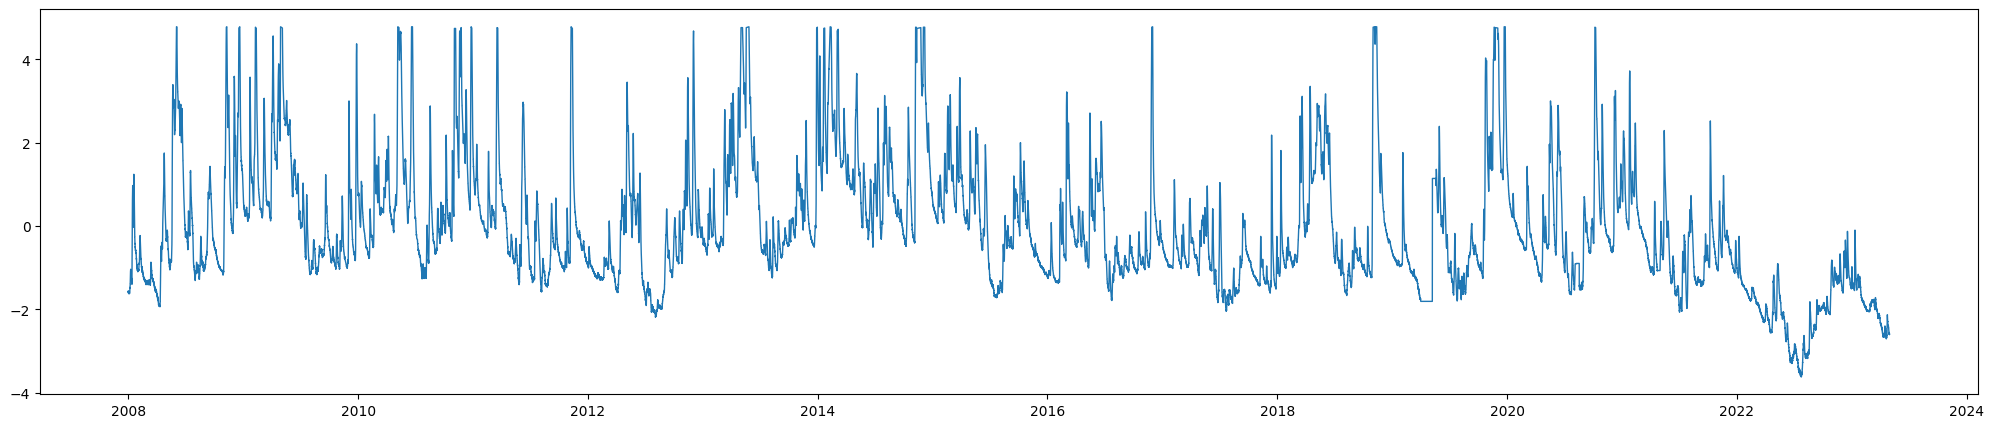

In [73]:
plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'], De, linewidth=1)


In [74]:
df = data1_castelmassa
df['date'] = pd.to_datetime(df['Orario'])  # Convert 'date' column to DateTime
monthly_avg = df.groupby([df['date'].dt.year, df['date'].dt.month])['Level'].mean()
yearly_avg = monthly_avg.groupby(level=0).mean()

In [75]:
# Convert monthly_avg Series to a DataFrame
df = monthly_avg.rename_axis(['Year', 'Month']).reset_index(name='Average')
df['Year'] = df['Year'].astype(str)  # Convert 'Year' column to string
df['Month'] = df['Month'].astype(str)  # Convert 'Month' column to string
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], format='%Y-%m')

print(df)

     Year Month   Average       Date
0    2008     1  6.798937 2008-01-01
1    2008     2  6.422248 2008-02-01
2    2008     3  6.139312 2008-03-01
3    2008     4  6.844403 2008-04-01
4    2008     5  8.146102 2008-05-01
..    ...   ...       ...        ...
179  2022    12  6.406492 2022-12-01
180  2023     1  6.187473 2023-01-01
181  2023     2  5.546935 2023-02-01
182  2023     3  5.526868 2023-03-01
183  2023     4  4.987097 2023-04-01

[184 rows x 4 columns]


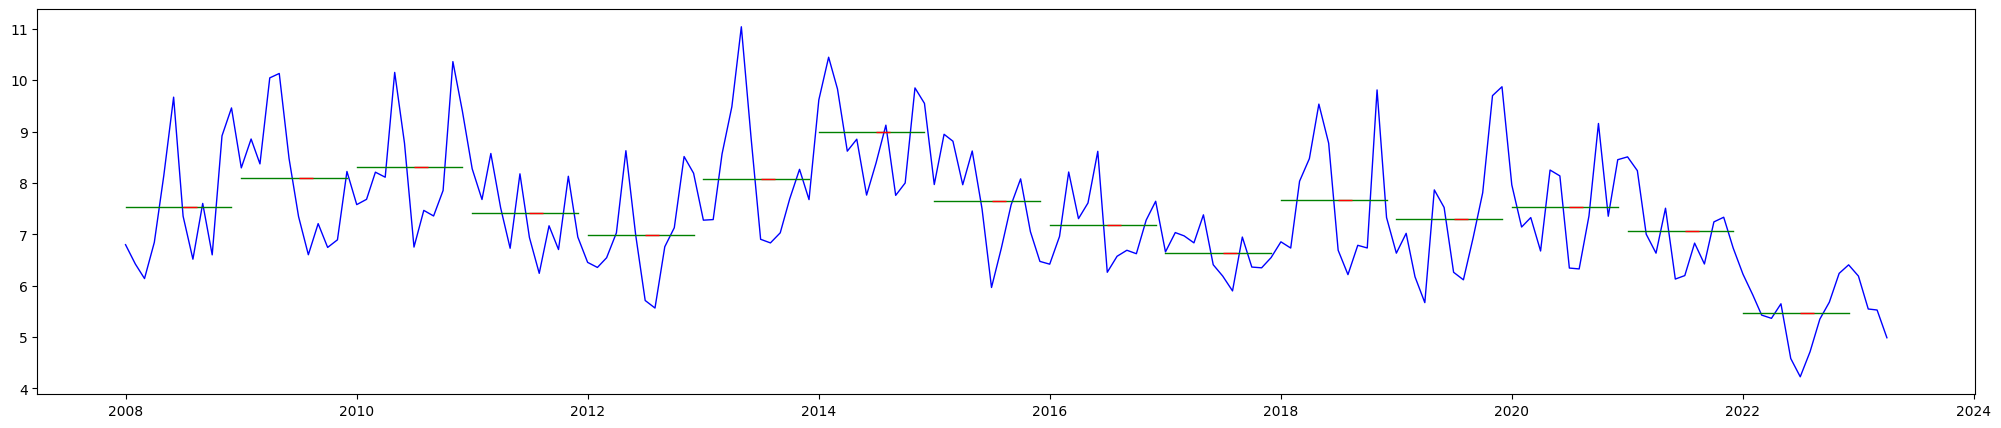

In [76]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i],np.ones(np.size(df['Average'][i-12:i]))*np.mean(df['Average'][i-12:i]),color='green', linewidth=1)

for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-6],np.mean(df['Average'][i-12:i]),color='red', marker=1, markersize=10)


[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  8.25226794e+00
  1.00000000e+00 -7.63031098e-03]


C:\Users\lofer\miniconda3\envs\tools_env\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


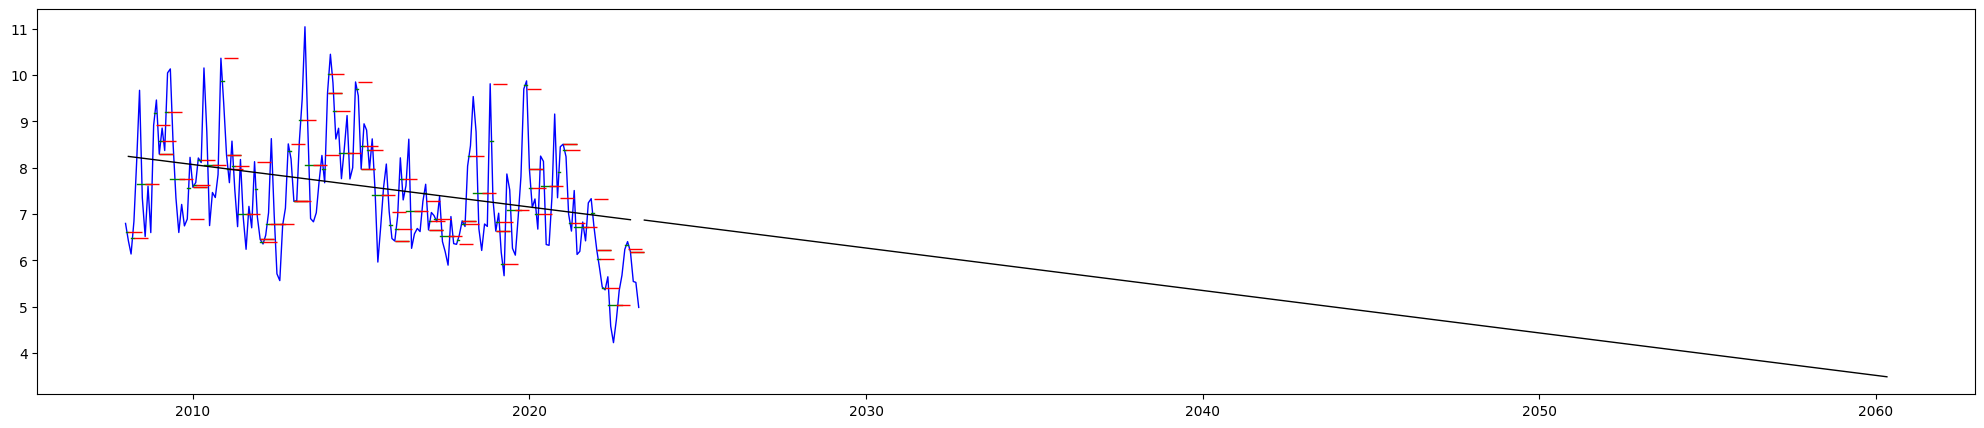

In [77]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i-10],np.ones(np.size(df['Average'][i-12:i-10]))*np.mean(df['Average'][i-12:i-10]),color='green', linewidth=1)
    plt.plot(df['Date'][i-10:i-8],np.ones(np.size(df['Average'][i-10:i-8]))*np.mean(df['Average'][i-10:i-8]),color='green', linewidth=1)
    plt.plot(df['Date'][i-8:i-2],np.ones(np.size(df['Average'][i-8:i-2]))*np.mean(df['Average'][i-8:i-2]),color='green', linewidth=1)
    plt.plot(df['Date'][i-2:i],np.ones(np.size(df['Average'][i-2:i]))*np.mean(df['Average'][i-2:i]),color='green', linewidth=1)
    plt.plot(df['Date'][i],df['Average'][i],color='green', marker=1, markersize=10)

x = []
y = []
for i in range(12,np.size(df['Date']),12):
    #x.append(df['Date'][i-11])
    #x.append(df['Date'][i-9])
    #x.append(df['Date'][i-5])
    #x.append(df['Date'][i-1])
    #x.append(df['Date'][i])
    x.append(i-11)
    x.append(i-9)
    x.append(i-5)
    x.append(i-1)
    x.append(i)
    y.append(np.mean(df['Average'][i-12:i-10])) 
    y.append(np.mean(df['Average'][i-10:i-8])) 
    y.append(np.mean(df['Average'][i-8:i-2])) 
    y.append(np.mean(df['Average'][i-2:i-1])) 
    y.append(df['Average'][i]) 

    plt.plot(df['Date'][i-11],np.mean(df['Average'][i-12:i-10]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-9],np.mean(df['Average'][i-10:i-8]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-5],np.mean(df['Average'][i-8:i-2]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-1],np.mean(df['Average'][i-2:i-1]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i],df['Average'][i],color='red', marker=1, markersize=10)

def objective(x, a, b, c, d, e, f):
    return (a*0 + e*x*0) * np.sin(b*x+c) + d +f*x

import scipy
# fit curve
popt, _ = scipy.optimize.curve_fit(objective, x, y)
print(popt)

# unpack optima parameters for the objective function
a, b, c, d, e, f = popt

y_new = []
# use optimal parameters to calculate new values
for j in range(np.size(x)):
    y_new.append( objective(x[j], a*2, b, c, d, e, f) ) 

plt.plot(df['Date'][x],y_new,color='black', linewidth=1)


new_date = pd.read_excel('Date.xlsx')
new_date = new_date.Date
new_x = []
pos = []
# use optimal parameters to calculate new values
for j in range(192,180+np.size(new_date),12):
    pos.append(j-11-180)
    pos.append(j-9-180)
    pos.append(j-5-180)
    pos.append(j-1-180)
    pos.append(j-180)
    new_x.append(j-11)
    new_x.append(j-9)
    new_x.append(j-5)
    new_x.append(j-1)
    new_x.append(j)
    
y_NEW = []
for j in range(np.size(new_x)):
    y_NEW.append( objective(new_x[j], a*2, b, c, d, e, f) ) 

plt.plot(pd.to_datetime(new_date[pos]),y_NEW,color='black', linewidth=1)


In [78]:
df['Date'][0], y_new[0], y_NEW[-1]

(Timestamp('2008-01-01 00:00:00'), 8.24463763278612, 3.490953893763642)

In [79]:
y

[6.610592290775383,
 6.491857259334233,
 7.648353549078519,
 8.918273716951788,
 8.294089673913044,
 8.575179043175835,
 9.209123252370837,
 7.752247411336588,
 6.893588907014682,
 7.578997252747253,
 7.63036688984668,
 8.161457515071245,
 8.059587221470663,
 10.362620232172471,
 8.276653225806452,
 7.97744119623656,
 8.045061546166751,
 6.993057480958921,
 8.130801282051282,
 6.4544489247311825,
 6.405091897524093,
 6.786920681910983,
 6.796549499891292,
 8.51465671641791,
 7.27607299270073,
 7.281793110106979,
 9.024210099053285,
 8.0610532760714,
 8.265516759776537,
 9.616953937592868,
 10.032569405771223,
 9.22482638888889,
 8.315458346393571,
 9.850807291666667,
 7.969892037786774,
 8.458933934301243,
 8.389439006657994,
 7.411952583008066,
 7.052137834036568,
 6.4194500723589005,
 6.689035381007036,
 7.759962982093664,
 7.062653225806453,
 7.2769266055045865,
 6.658024193548386,
 6.8463180669234465,
 6.9024106182795695,
 6.530887271339608,
 6.348502906976745,
 6.854529569892474,


[7.96617691 8.04478321 8.1569512  8.04135502 9.00746161 8.31329367
 6.96681998 6.98250172 7.49687413 7.74415651 8.71799163 8.49335418]


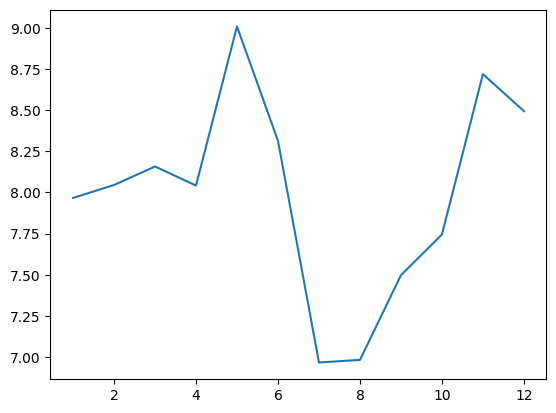

In [80]:
indexes=np.where(np.int32(df['Year'])==2008)[0]
base=np.array(df['Average'][indexes])
for i in range(2009, 2023):
    indexes=np.where(np.int32(df['Year'])==i)[0]
    base = base + np.array(df['Average'][indexes])
base = base / (2023-2009)
print(base)
plt.plot(np.arange(1,len(base)+1), base)
plt.savefig('pictures_lollo/castelmassa.png')

In [81]:
meany=np.zeros((60-8,2))
k=0
for i in range(0,5*(23-8), 5):
    meany[k,0] = k +2008
    meany[k,1] = np.mean(y_new[i:(i+5)])
    k=k+1
for i in range(0,5*(60-23), 5):
    meany[k,0] = k +2008
    meany[k,1] = np.mean(y_NEW[i:(i+5)])
    k=k+1
meany

array([[2008.        ,    8.20038183],
       [2009.        ,    8.1088181 ],
       [2010.        ,    8.01725437],
       [2011.        ,    7.92569063],
       [2012.        ,    7.8341269 ],
       [2013.        ,    7.74256317],
       [2014.        ,    7.65099944],
       [2015.        ,    7.55943571],
       [2016.        ,    7.46787198],
       [2017.        ,    7.37630824],
       [2018.        ,    7.28474451],
       [2019.        ,    7.19318078],
       [2020.        ,    7.10161705],
       [2021.        ,    7.01005332],
       [2022.        ,    6.91848958],
       [2023.        ,    6.82692585],
       [2024.        ,    6.73536212],
       [2025.        ,    6.64379839],
       [2026.        ,    6.55223466],
       [2027.        ,    6.46067093],
       [2028.        ,    6.36910719],
       [2029.        ,    6.27754346],
       [2030.        ,    6.18597973],
       [2031.        ,    6.094416  ],
       [2032.        ,    6.00285227],
       [2033.        ,   

In [82]:
df[df['Date'].dt.year == 2015]

Year Month   Average       Date
84  2015     1  7.969892 2015-01-01
85  2015     2  8.947976 2015-02-01
86  2015     3  8.813096 2015-03-01
87  2015     4  7.965782 2015-04-01
88  2015     5  8.622863 2015-05-01
89  2015     6  7.498387 2015-06-01
90  2015     7  5.965500 2015-07-01
91  2015     8  6.729727 2015-08-01
92  2015     9  7.575211 2015-09-01
93  2015    10  8.080027 2015-10-01
94  2015    11  7.052138 2015-11-01
95  2015    12  6.473283 2015-12-01

[7.471781388671415, 7.559209567551853, 7.235061185315511, 8.136792184846156, 7.394334209538127]


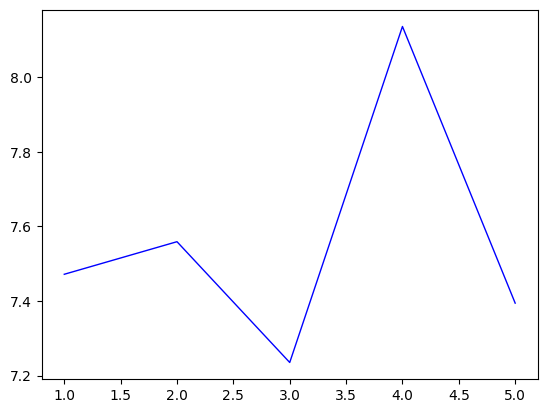

In [83]:
v = []
for i in range(0,5):
    step=np.arange(i,5*(2023-2008),5)
    v.append( np.mean( [y[j] for j in step] ) )
print(v)
plt.plot(np.arange(1,6),v,color='blue', linewidth=1)

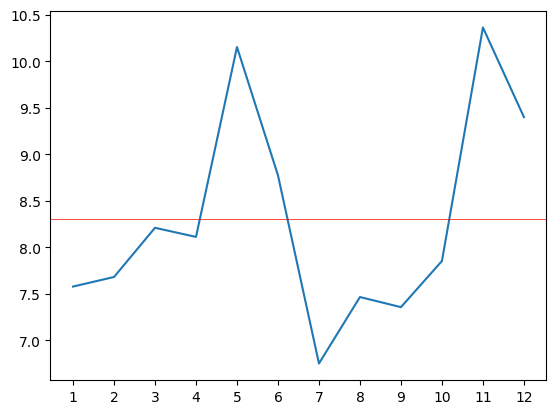

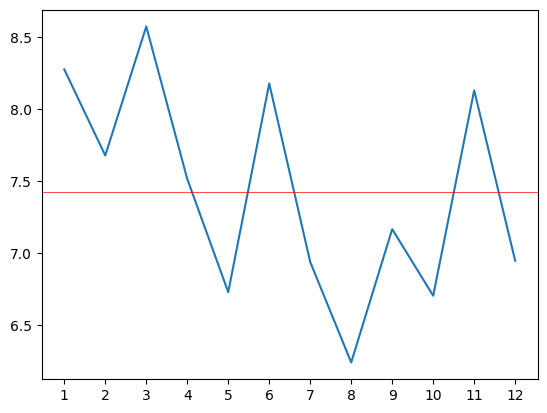

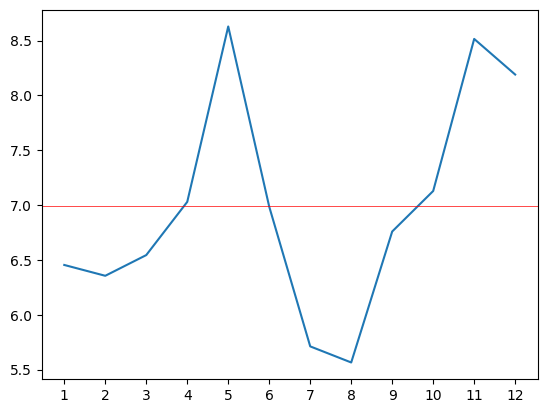

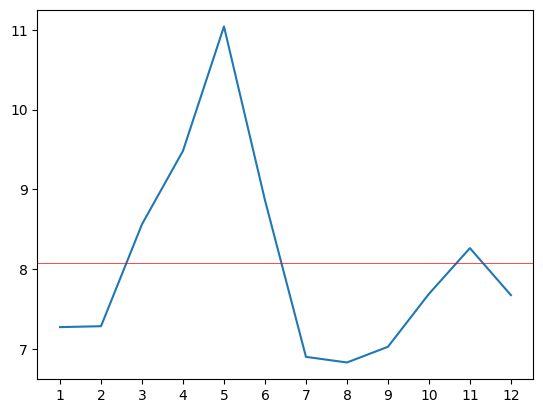

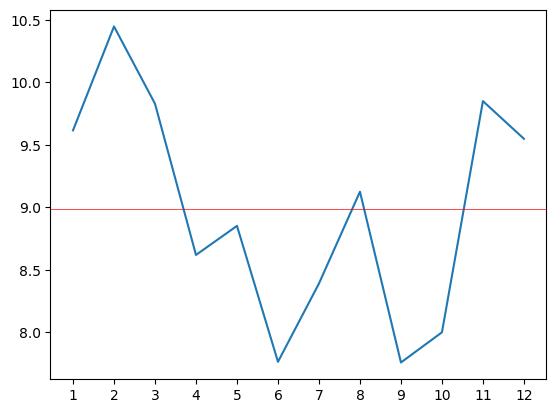

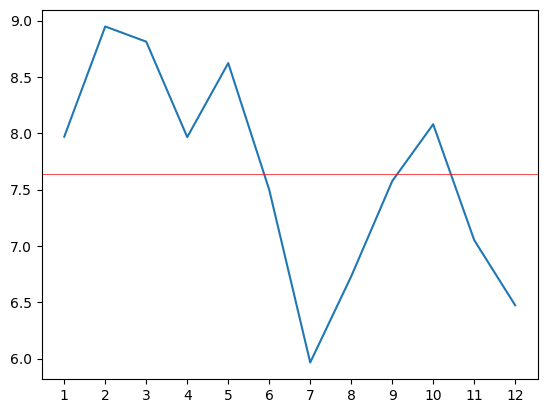

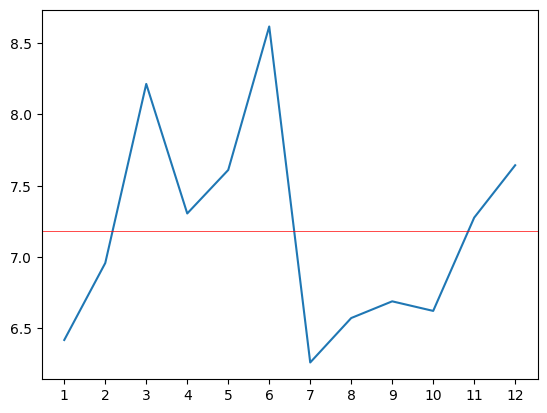

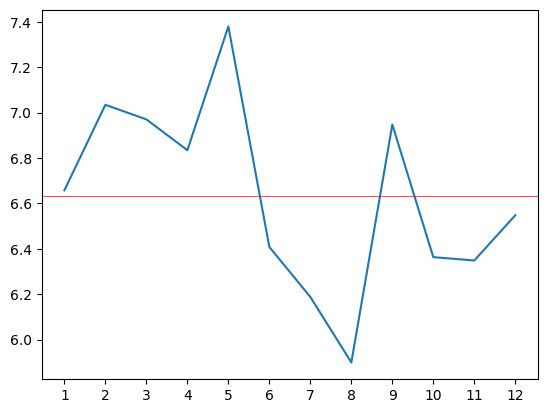

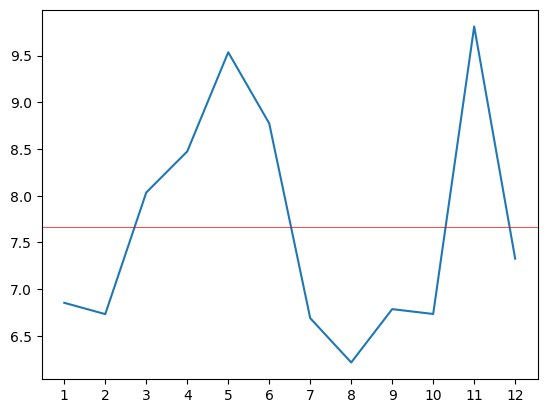

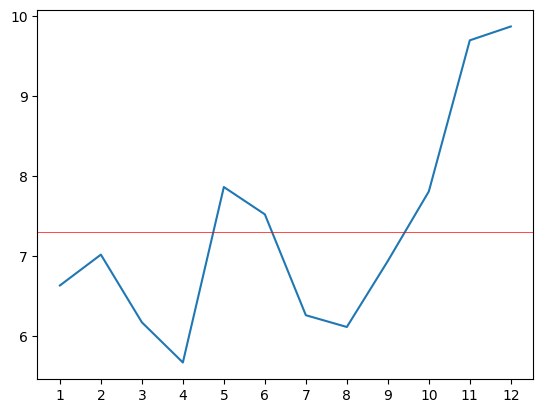

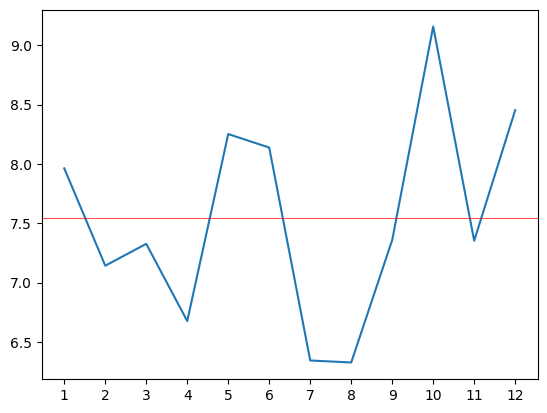

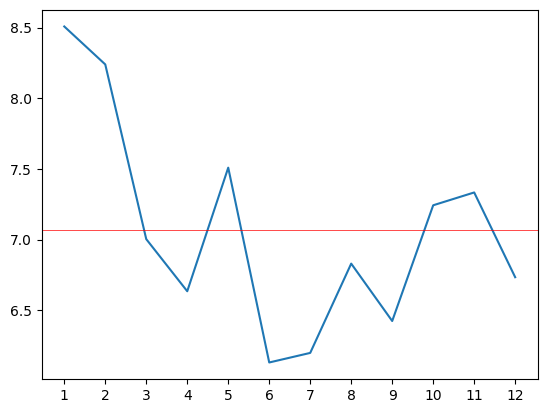

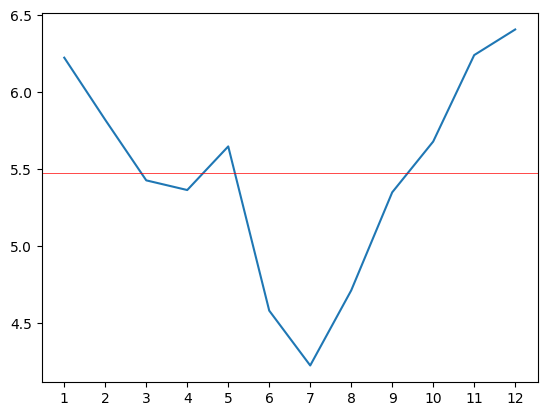

In [84]:
for i in range(2010, 2023):
    df2 = df[df['Date'].dt.year == i]
    plt.plot(df2['Month'], df2['Average'])
    plt.axhline(np.mean(df2['Average']), c='red', linewidth=0.5)
#     plt.ylim((-0.3, 0.3))
    plt.show()

In [85]:
# Funzione da minimizzare
def model(params, x):
    A, B, C, D, E, F, w1, w2, theta1,theta2 = params
#     return (A + B*x + F*x**2) * np.sin(w * x + theta) + C*x + D + E*x**2
    return A * np.sin(w1 * x + theta1) + C*x + D + B * np.sin(w2 * x + theta2)

In [86]:
# Funzione di errore
def error(params, x, y):
    return model(params, x) - y

In [87]:
from scipy.optimize import least_squares

# Dati di input
values = df['Average']  # Inserisci qui i tuoi valori giornalieri
x = np.arange(len(values))  # Creazione dell'array degli indici
y = np.array(values)  # Creazione dell'array dei valori giornalieri

# Parametri iniziali
params0 = np.ones(10)  # Valori iniziali per A, w e theta

# Ottimizzazione
result = least_squares(error, params0, args=(x, y))

print(result.x)

[-0.50210681 -0.2637889  -0.00903168  8.24855282 -7.13595736 -7.57695881
  4.18171427 -2.10725137  2.45419043  0.36397854]


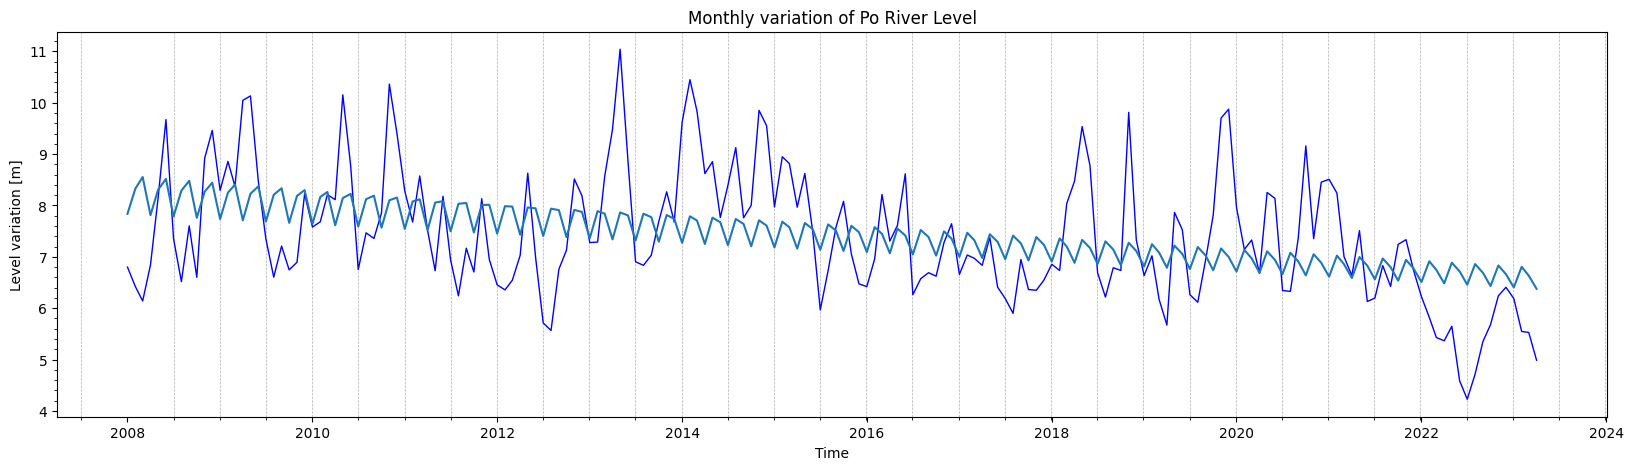

In [88]:
plt.subplots(figsize=(20, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
plt.title('Monthly variation of Po River Level')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

xx=list(range(len(df['Average'])))
sinfx=[]
for x in xx:
    #sinfx.append(-math.sin(math.pi*x/3)*sigma+mean-x*0.005)
    sinfx.append( model(result.x, x) )
plt.plot(df['Date'],sinfx)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)

([<matplotlib.axis.XTick at 0x1450eaeb070>,
 [Text(0.0, 0, '2008-1'),
  Text(12.0, 0, '2009-1'),
  Text(24.0, 0, '2010-1'),
  Text(36.0, 0, '2011-1'),
  Text(48.0, 0, '2012-1'),
  Text(60.0, 0, '2013-1'),
  Text(72.0, 0, '2014-1'),
  Text(84.0, 0, '2015-1'),
  Text(96.0, 0, '2016-1'),
  Text(108.0, 0, '2017-1'),
  Text(120.0, 0, '2018-1'),
  Text(132.0, 0, '2019-1'),
  Text(144.0, 0, '2020-1'),
  Text(156.0, 0, '2021-1'),
  Text(168.0, 0, '2022-1'),
  Text(180.0, 0, '2023-1')])

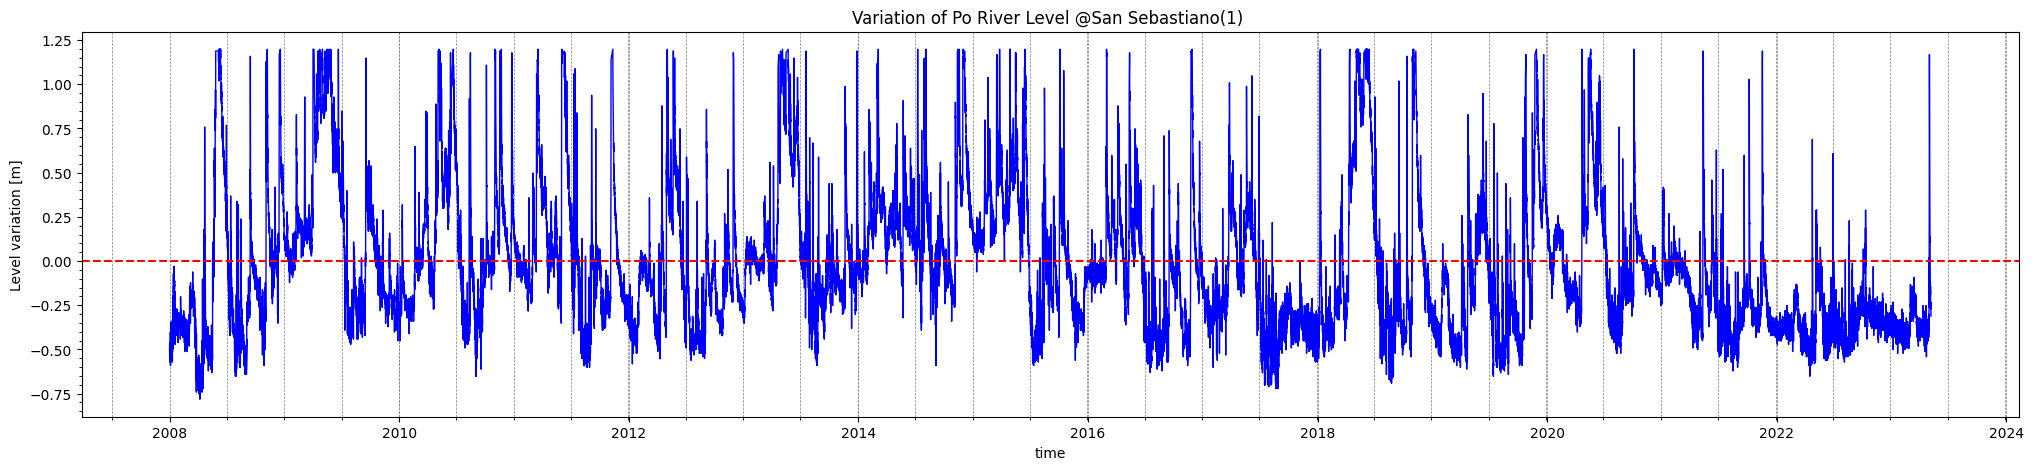

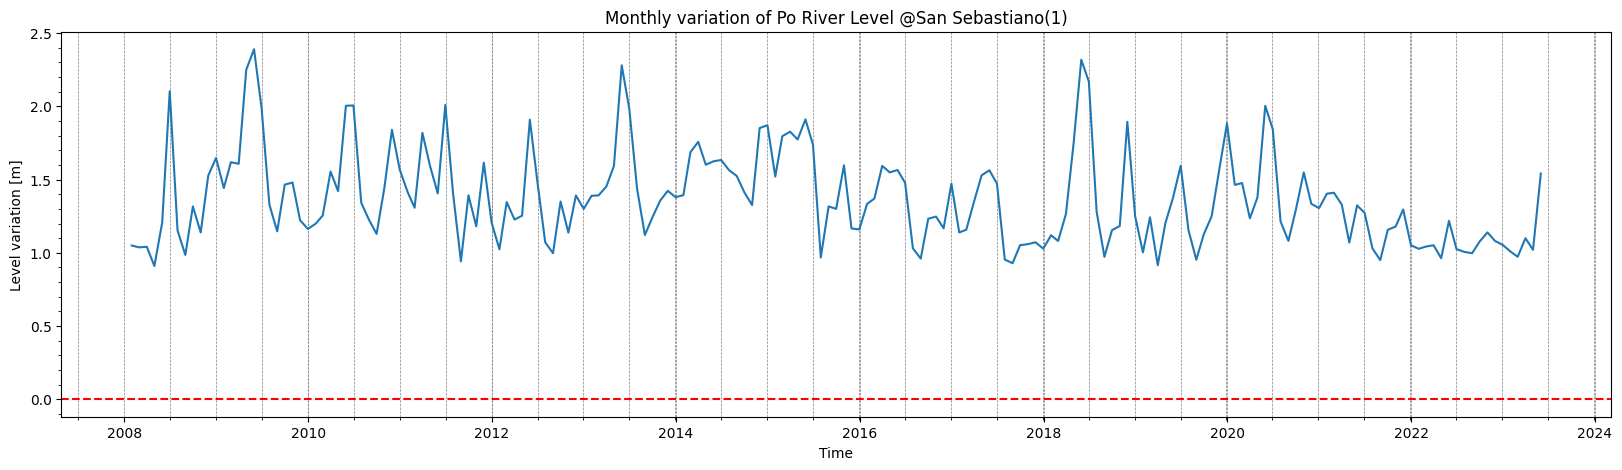

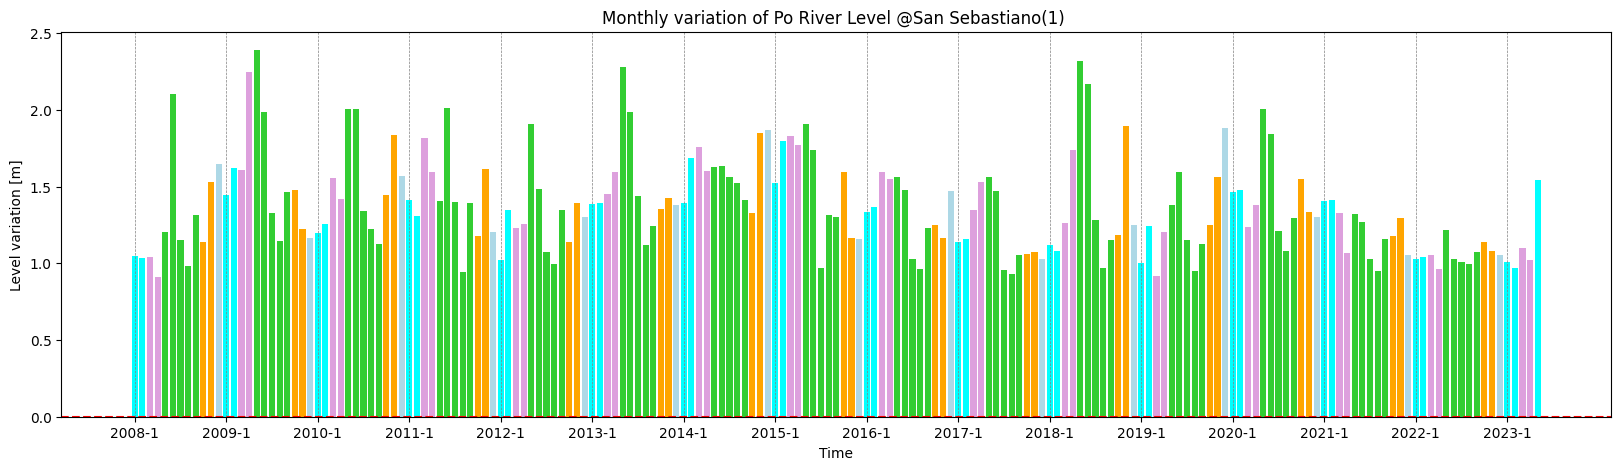

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#Stazioni di rilevazione:
#1) San Sebastiano (Torino)
#2) Isola S.Antonio PO (Alessandria)
#3) Spessa (Pavia)
#4) Boretto (Reggio-Emilia)
#5) Castelmassa (Rovigo)
#6) Polesella (Rovigo)

#Setting the color scheme for seasons
colors=['cyan','cyan','plum','plum','limegreen','limegreen','limegreen','limegreen','limegreen','orange','orange','lightblue']*15
colors.append('cyan')
colors.append('cyan')
colors.append('plum')
colors.append('plum')
#Range for boxplot visualization
date_range =['2008-1','2009-1','2010-1','2011-1','2012-1','2013-1','2014-1','2015-1','2016-1','2017-1','2018-1','2019-1','2020-1','2021-1','2022-1','2023-1']


#1) SAN SEBASTIANO 
#Import csv datas 
data1_ssebastiano = pd.read_csv('SSebastiano.csv',sep=';',low_memory=False)
#Remove undesired columns
data1_ssebastiano.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data1_ssebastiano.rename(columns={'San Sebastiano Po - Livello Idrometrico - 35580 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN
data1_ssebastiano.dropna(inplace=True)
data1_ssebastiano = data1_ssebastiano.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data1_ssebastiano.describe()
#In case it gives error because of non numerical data
data1_ssebastiano['Level'] = pd.to_numeric(data1_ssebastiano['Level'], errors='coerce')

#Remove outliers
mean=np.mean(data1_ssebastiano['Level'])
sigma = np.std(data1_ssebastiano['Level'])
#Remove rows with z-score greater than 3
data1_ssebastiano = data1_ssebastiano[ data1_ssebastiano['Level']< mean+2.5*sigma]
#Now for smaller extremes
data1_ssebastiano = data1_ssebastiano[ data1_ssebastiano['Level']> mean-2.5*sigma]

#Obtain the delta Level-Mean
data1_ssebastiano['Delta'] = data1_ssebastiano['Level']-mean
De=data1_ssebastiano['Delta']
De = De.reset_index(drop=True)

#Rename the time
data1_ssebastiano['Orario'] = pd.to_datetime(data1_ssebastiano['Orario'])

#Plot result
plt.subplots(figsize=(25, 5))
plt.plot(data1_ssebastiano['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @San Sebastiano(1) ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


#Make a monthly avarage
monthly_avg1 = data1_ssebastiano.groupby(pd.Grouper(key='Orario', freq='M')).mean(numeric_only=True)

plt.subplots(figsize=(20, 5))
plt.plot(monthly_avg1['Level'])
plt.title('Monthly variation of Po River Level @San Sebastiano(1)')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)

monthly_avg1['Date']=['{}-{}'.format(i.year,i.month) for i in monthly_avg1.index.tolist()]

#Actually plotting the barplot
plt.subplots(figsize=(20, 5))
plt.bar(monthly_avg1['Date'],monthly_avg1['Level'], color=colors)
plt.title('Monthly variation of Po River Level @San Sebastiano(1) ')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x',color='gray', linestyle='--', linewidth=0.5)

plt.xticks(date_range)

In [93]:
(monthly_avg1)

Level  Valore assoluto     Delta    Date
Orario                                                 
2008-01-31  1.049474         1.049474 -0.352121  2008-1
2008-02-29  1.037295         1.037295 -0.364300  2008-2
2008-03-31  1.041089         1.041089 -0.360507  2008-3
2008-04-30  0.909646         0.909646 -0.491950  2008-4
2008-05-31  1.206303         1.206303 -0.195293  2008-5
...              ...              ...       ...     ...
2023-01-31  1.007863         1.007863 -0.393733  2023-1
2023-02-28  0.972708         0.972708 -0.428887  2023-2
2023-03-31  1.099717         1.099717 -0.301878  2023-3
2023-04-30  1.020431         1.020431 -0.381165  2023-4
2023-05-31  1.541037         1.541037  0.139442  2023-5

[185 rows x 4 columns]

[1.35167166 1.44424578 1.50195363 1.55901485 1.86446185 1.84272956
 1.28108275 1.14999733 1.33625518 1.37620981 1.53181704 1.4527153 ]


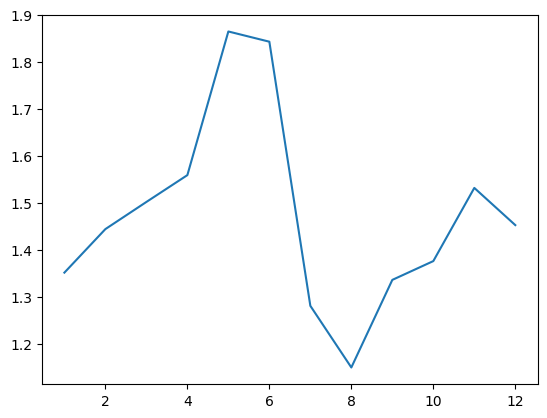

In [105]:
df = monthly_avg1
indexes=np.where(np.int32(df.index.year)==2008)[0]
base=np.array(df['Level'][indexes])
for i in range(2009, 2023):
    indexes=np.where(np.int32(df.index.year)==i)[0]
    base = base + np.array(df['Level'][indexes])
base = base / (2023-2009)
print(base)
plt.plot(np.arange(1,len(base)+1), base)
plt.savefig('pictures_lollo/sanssebastiano.png')

C:\Users\lofer\miniconda3\envs\tools_env\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.49043551e+00
  1.00000000e+00 -1.43986979e-03]


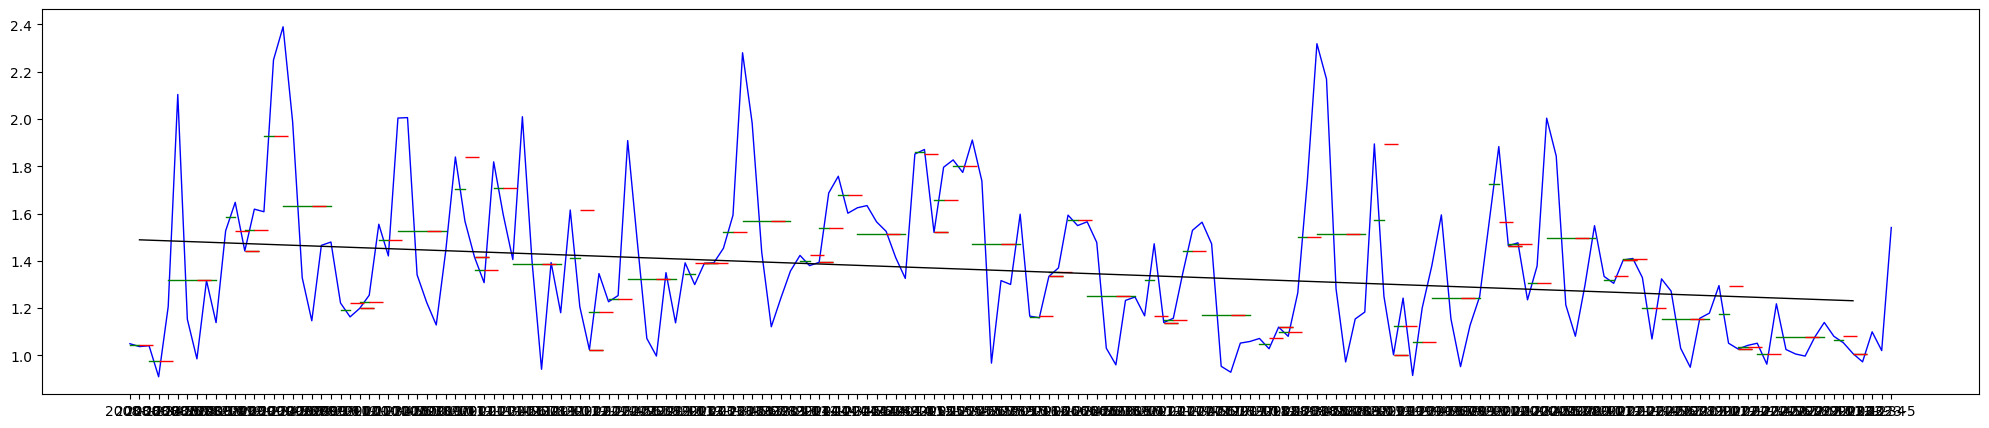

In [103]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Level'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i-10],np.ones(np.size(df['Level'][i-12:i-10]))*np.mean(df['Level'][i-12:i-10]),color='green', linewidth=1)
    plt.plot(df['Date'][i-10:i-8],np.ones(np.size(df['Level'][i-10:i-8]))*np.mean(df['Level'][i-10:i-8]),color='green', linewidth=1)
    plt.plot(df['Date'][i-8:i-2],np.ones(np.size(df['Level'][i-8:i-2]))*np.mean(df['Level'][i-8:i-2]),color='green', linewidth=1)
    plt.plot(df['Date'][i-2:i],np.ones(np.size(df['Level'][i-2:i]))*np.mean(df['Level'][i-2:i]),color='green', linewidth=1)
    plt.plot(df['Date'][i],df['Level'][i],color='green', marker=1, markersize=10)

x = []
y = []
for i in range(12,np.size(df['Date']),12):
    #x.append(df['Date'][i-11])
    #x.append(df['Date'][i-9])
    #x.append(df['Date'][i-5])
    #x.append(df['Date'][i-1])
    #x.append(df['Date'][i])
    x.append(i-11)
    x.append(i-9)
    x.append(i-5)
    x.append(i-1)
    x.append(i)
    y.append(np.mean(df['Level'][i-12:i-10])) 
    y.append(np.mean(df['Level'][i-10:i-8])) 
    y.append(np.mean(df['Level'][i-8:i-2])) 
    y.append(np.mean(df['Level'][i-2:i-1])) 
    y.append(df['Level'][i]) 

    plt.plot(df['Date'][i-11],np.mean(df['Level'][i-12:i-10]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-9],np.mean(df['Level'][i-10:i-8]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-5],np.mean(df['Level'][i-8:i-2]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-1],np.mean(df['Level'][i-2:i-1]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i],df['Level'][i],color='red', marker=1, markersize=10)

def objective(x, a, b, c, d, e, f):
    return (a*0 + e*x*0) * np.sin(b*x+c) + d +f*x

import scipy
# fit curve
popt, _ = scipy.optimize.curve_fit(objective, x, y)
print(popt)

# unpack optima parameters for the objective function
a, b, c, d, e, f = popt

y_new = []
# use optimal parameters to calculate new values
for j in range(np.size(x)):
    y_new.append( objective(x[j], a*2, b, c, d, e, f) ) 

plt.plot(df['Date'][x],y_new,color='black', linewidth=1)


new_date = pd.read_excel('Date.xlsx')
new_date = new_date.Date
new_x = []
pos = []
# use optimal parameters to calculate new values
for j in range(192,180+np.size(new_date),12):
    pos.append(j-11-180)
    pos.append(j-9-180)
    pos.append(j-5-180)
    pos.append(j-1-180)
    pos.append(j-180)
    new_x.append(j-11)
    new_x.append(j-9)
    new_x.append(j-5)
    new_x.append(j-1)
    new_x.append(j)
    
y_NEW = []
for j in range(np.size(new_x)):
    y_NEW.append( objective(new_x[j], a*2, b, c, d, e, f) ) 

# plt.plot(pd.to_datetime(new_date[pos]),y_NEW,color='black', linewidth=1)


In [110]:
y_new[0], y_new[-1], (y_new[-1]-y_new[0])/(2023/2008)/1.4

(1.4388394239639302, 0.6333974176569526, -0.5710499077270006)

In [ ]:
#2) SANT'ANTONIO ---------------------------
#Import csv datas 
data2_santonio = pd.read_csv('SAntonio.csv',sep=';',low_memory=False)
#Remove undesired columns
data2_santonio.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data2_santonio.rename(columns={'Isola S.Antonio PO - Livello Idrometrico - 11331 (m)':'Level'}, inplace=True)
#Remove lines containing NAN
data2_santonio.dropna(inplace=True)
data2_santonio = data2_santonio.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data2_santonio.describe()
#In case it gives error because of non numerical data
data2_santonio['Level'] = pd.to_numeric(data2_santonio['Level'], errors='coerce')

#Remove outliers
mean=np.mean(data2_santonio['Level'])
sigma = np.std(data2_santonio['Level'])
#Remove rows with z-score greater than 3
data2_santonio = data2_santonio[ data2_santonio['Level']< mean+3*sigma]
#Now for smaller extremes
data2_santonio = data2_santonio[ data2_santonio['Level']> mean-3*sigma]


#Obtain the delta Level-Mean
data2_santonio['Delta'] = data2_santonio['Level']-mean
De=data2_santonio['Delta']
De = De.reset_index(drop=True)

#Rename the time
data2_santonio['Orario'] = pd.to_datetime(data2_santonio['Orario'])

#Plot result
plt.subplots(figsize=(25, 5))
plt.plot(data2_santonio['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @SantAntonio(2)')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


#Make a monthly avarage
monthly_avg2 = data2_santonio.groupby(pd.Grouper(key='Orario', freq='M')).mean(numeric_only=True)

plt.subplots(figsize=(20, 5))
plt.plot(monthly_avg2['Delta'])
plt.title('Monthly variation of Po River Level @SantAntonio(2)')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)

monthly_avg2['Date']=['{}-{}'.format(i.year,i.month) for i in monthly_avg2.index.tolist()]

#Actually plotting the barplot
plt.subplots(figsize=(20, 5))
plt.bar(monthly_avg2['Date'],monthly_avg2['Delta'], color=colors)
plt.title('Monthly variation of Po River Level @SantAntonio(2) ')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x',color='gray', linestyle='--', linewidth=0.5)

plt.xticks(date_range)

[0.95783186 1.04267696 1.24595629 1.41047797 1.80552378 1.57773936
 0.79704876 0.67262973 0.82934591 0.868798   1.20958273 1.10753462]


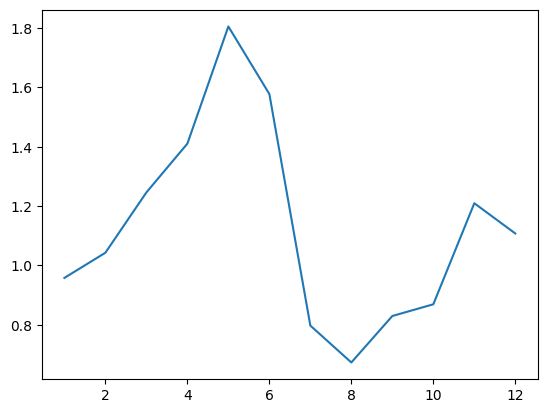

In [106]:
df = monthly_avg2
indexes=np.where(np.int32(df.index.year)==2008)[0]
base=np.array(df['Level'][indexes])
for i in range(2009, 2023):
    indexes=np.where(np.int32(df.index.year)==i)[0]
    base = base + np.array(df['Level'][indexes])
base = base / (2023-2009)
print(base)
plt.plot(np.arange(1,len(base)+1), base)
plt.savefig('pictures_lollo/santantonio.png')

C:\Users\lofer\miniconda3\envs\tools_env\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.          1.          1.          1.4433391   1.         -0.00449968]


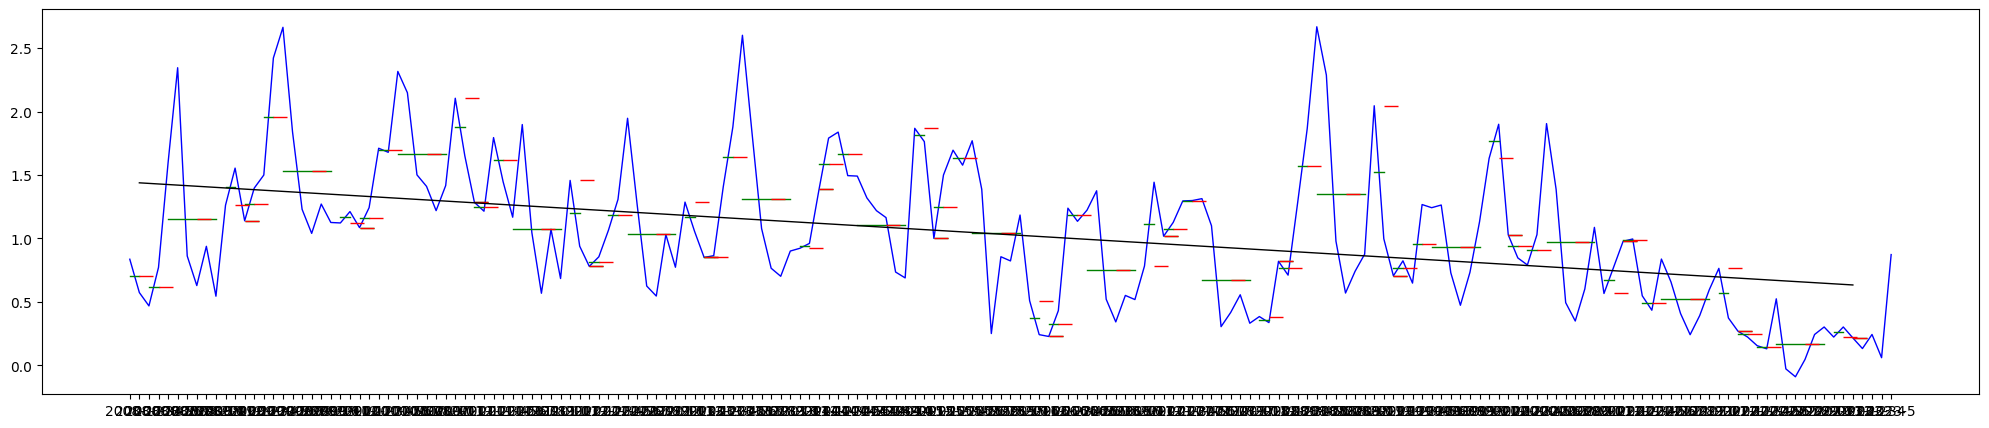

In [107]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Level'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i-10],np.ones(np.size(df['Level'][i-12:i-10]))*np.mean(df['Level'][i-12:i-10]),color='green', linewidth=1)
    plt.plot(df['Date'][i-10:i-8],np.ones(np.size(df['Level'][i-10:i-8]))*np.mean(df['Level'][i-10:i-8]),color='green', linewidth=1)
    plt.plot(df['Date'][i-8:i-2],np.ones(np.size(df['Level'][i-8:i-2]))*np.mean(df['Level'][i-8:i-2]),color='green', linewidth=1)
    plt.plot(df['Date'][i-2:i],np.ones(np.size(df['Level'][i-2:i]))*np.mean(df['Level'][i-2:i]),color='green', linewidth=1)
    plt.plot(df['Date'][i],df['Level'][i],color='green', marker=1, markersize=10)

x = []
y = []
for i in range(12,np.size(df['Date']),12):
    #x.append(df['Date'][i-11])
    #x.append(df['Date'][i-9])
    #x.append(df['Date'][i-5])
    #x.append(df['Date'][i-1])
    #x.append(df['Date'][i])
    x.append(i-11)
    x.append(i-9)
    x.append(i-5)
    x.append(i-1)
    x.append(i)
    y.append(np.mean(df['Level'][i-12:i-10])) 
    y.append(np.mean(df['Level'][i-10:i-8])) 
    y.append(np.mean(df['Level'][i-8:i-2])) 
    y.append(np.mean(df['Level'][i-2:i-1])) 
    y.append(df['Level'][i]) 

    plt.plot(df['Date'][i-11],np.mean(df['Level'][i-12:i-10]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-9],np.mean(df['Level'][i-10:i-8]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-5],np.mean(df['Level'][i-8:i-2]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-1],np.mean(df['Level'][i-2:i-1]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i],df['Level'][i],color='red', marker=1, markersize=10)

def objective(x, a, b, c, d, e, f):
    return (a*0 + e*x*0) * np.sin(b*x+c) + d +f*x

import scipy
# fit curve
popt, _ = scipy.optimize.curve_fit(objective, x, y)
print(popt)

# unpack optima parameters for the objective function
a, b, c, d, e, f = popt

y_new = []
# use optimal parameters to calculate new values
for j in range(np.size(x)):
    y_new.append( objective(x[j], a*2, b, c, d, e, f) ) 

plt.plot(df['Date'][x],y_new,color='black', linewidth=1)


new_date = pd.read_excel('Date.xlsx')
new_date = new_date.Date
new_x = []
pos = []
# use optimal parameters to calculate new values
for j in range(192,180+np.size(new_date),12):
    pos.append(j-11-180)
    pos.append(j-9-180)
    pos.append(j-5-180)
    pos.append(j-1-180)
    pos.append(j-180)
    new_x.append(j-11)
    new_x.append(j-9)
    new_x.append(j-5)
    new_x.append(j-1)
    new_x.append(j)
    
y_NEW = []
for j in range(np.size(new_x)):
    y_NEW.append( objective(new_x[j], a*2, b, c, d, e, f) ) 

# plt.plot(pd.to_datetime(new_date[pos]),y_NEW,color='black', linewidth=1)


In [109]:
y_new[0], y_new[-1], (y_new[-1]-y_new[0])/(2023/2008)/1.4

(1.4388394239639302, 0.6333974176569526, -0.5710499077270006)

([<matplotlib.axis.XTick at 0x145072d4be0>,
 [Text(0.0, 0, '2008-1'),
  Text(12.0, 0, '2009-1'),
  Text(24.0, 0, '2010-1'),
  Text(36.0, 0, '2011-1'),
  Text(48.0, 0, '2012-1'),
  Text(60.0, 0, '2013-1'),
  Text(72.0, 0, '2014-1'),
  Text(84.0, 0, '2015-1'),
  Text(96.0, 0, '2016-1'),
  Text(108.0, 0, '2017-1'),
  Text(120.0, 0, '2018-1'),
  Text(132.0, 0, '2019-1'),
  Text(144.0, 0, '2020-1'),
  Text(156.0, 0, '2021-1'),
  Text(168.0, 0, '2022-1'),
  Text(180.0, 0, '2023-1')])

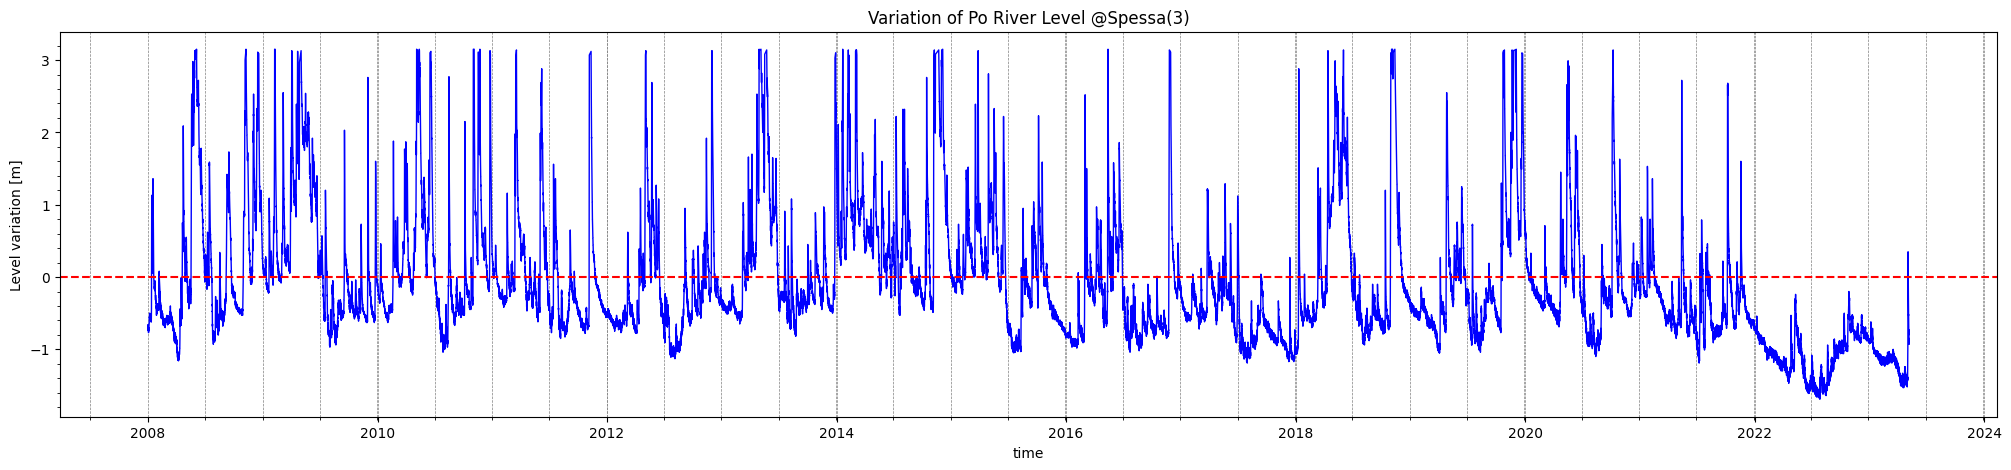

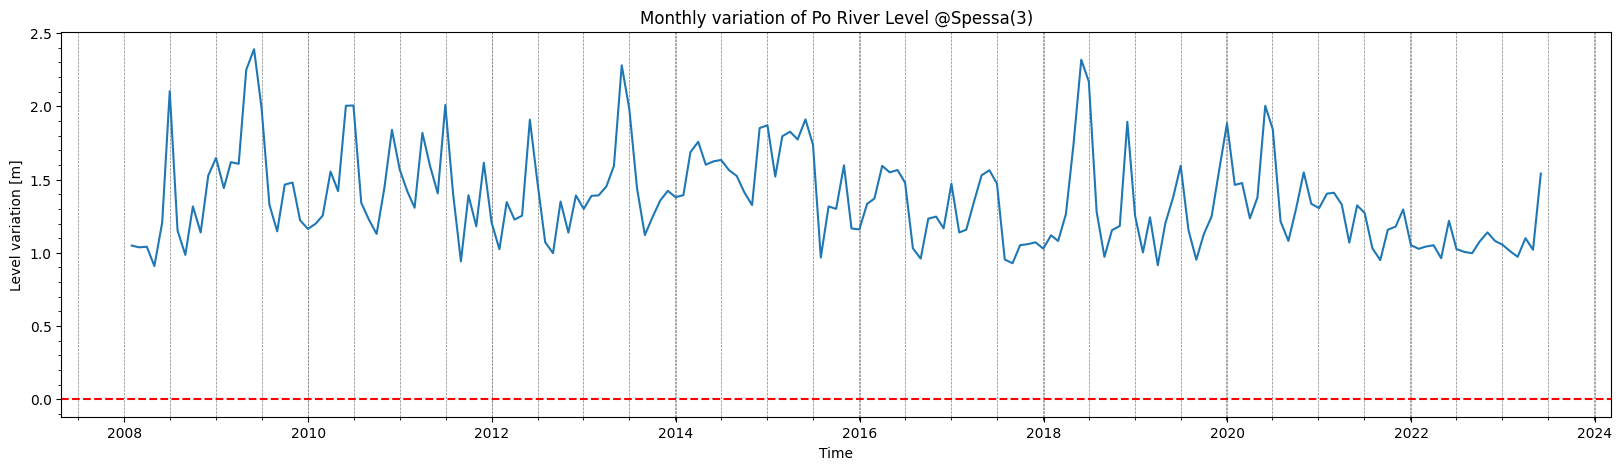

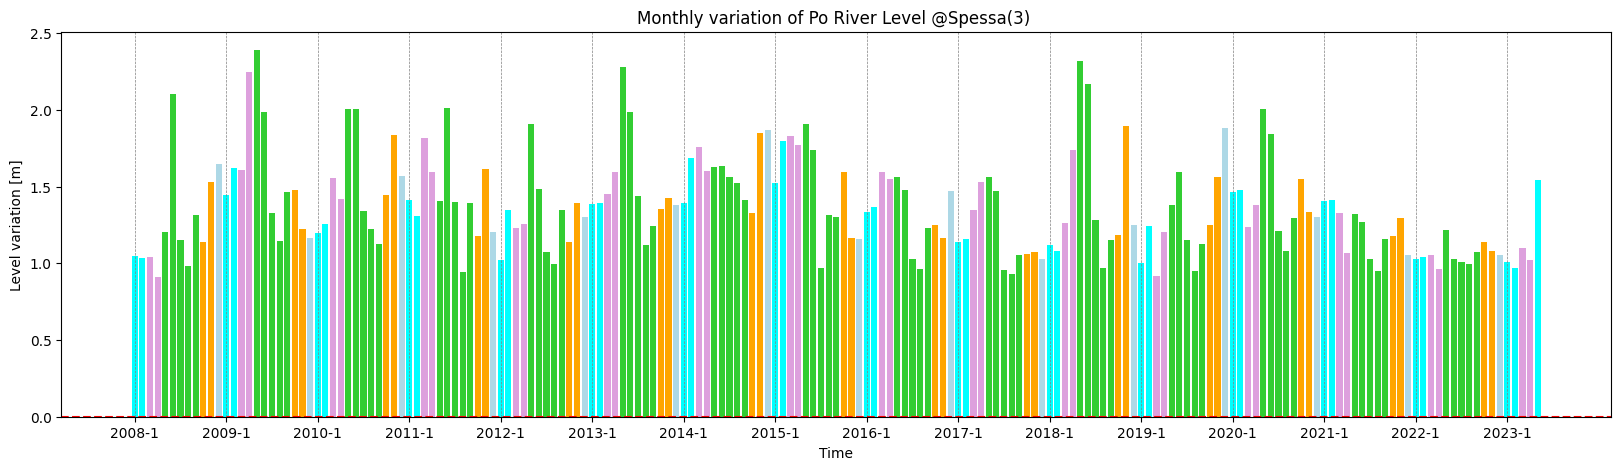

In [111]:
#3) SPESSA ------------------------------
#Import csv datas 
data3_spessa = pd.read_csv('Spessa.csv',sep=';',low_memory=False)
#Remove undesired columns
data3_spessa.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data3_spessa.rename(columns={'Spessa Po - Livello Idrometrico - 13943 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN
data3_spessa.dropna(inplace=True)
data3_spessa = data3_spessa.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data3_spessa.describe()
#In case it gives error because of non numerical data
data3_spessa['Level'] = pd.to_numeric(data3_spessa['Level'], errors='coerce')

#Remove outliers
mean=np.mean(data3_spessa['Level'])
sigma = np.std(data3_spessa['Level'])
#Remove rows with z-score greater than 3
data3_spessa = data3_spessa[ data3_spessa['Level']< mean+3*sigma]
#Now for smaller extremes
data3_spessa = data3_spessa[ data3_spessa['Level']> mean-3*sigma]

#Obtain the delta Level-Mean
data3_spessa['Delta'] = data3_spessa['Level']-mean
De=data3_spessa['Delta']
De = De.reset_index(drop=True)

#Rename the time
data3_spessa['Orario'] = pd.to_datetime(data3_spessa['Orario'])

#Plot result
plt.subplots(figsize=(25, 5))
plt.plot(data3_spessa['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Spessa(3)')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


#Make a monthly avarage
monthly_avg3= data3_spessa.groupby(pd.Grouper(key='Orario', freq='M')).mean(numeric_only=True)

plt.subplots(figsize=(20, 5))
plt.plot(monthly_avg1['Level'])
plt.title('Monthly variation of Po River Level @Spessa(3)')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)

monthly_avg1['Date']=['{}-{}'.format(i.year,i.month) for i in monthly_avg1.index.tolist()]

#Actually plotting the barplot
plt.subplots(figsize=(20, 5))
plt.bar(monthly_avg1['Date'],monthly_avg1['Level'], color=colors)
plt.title('Monthly variation of Po River Level @Spessa(3) ')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x',color='gray', linestyle='--', linewidth=0.5)

plt.xticks(date_range)

[-1.26972989 -1.23087203 -1.04911466 -0.88929622 -0.23225935 -0.64605924
 -1.52932905 -1.64696596 -1.35845176 -1.23245149 -0.75266863 -0.99998796]


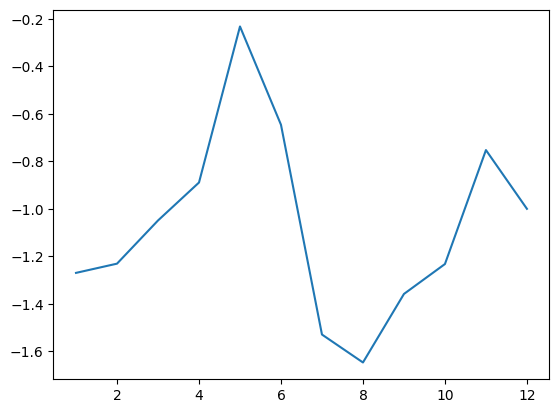

In [112]:
df = monthly_avg3
indexes=np.where(np.int32(df.index.year)==2008)[0]
base=np.array(df['Level'][indexes])
for i in range(2009, 2023):
    indexes=np.where(np.int32(df.index.year)==i)[0]
    base = base + np.array(df['Level'][indexes])
base = base / (2023-2009)
print(base)
plt.plot(np.arange(1,len(base)+1), base)
plt.savefig('pictures_lollo/santantonio.png')

KeyError: 'Date'

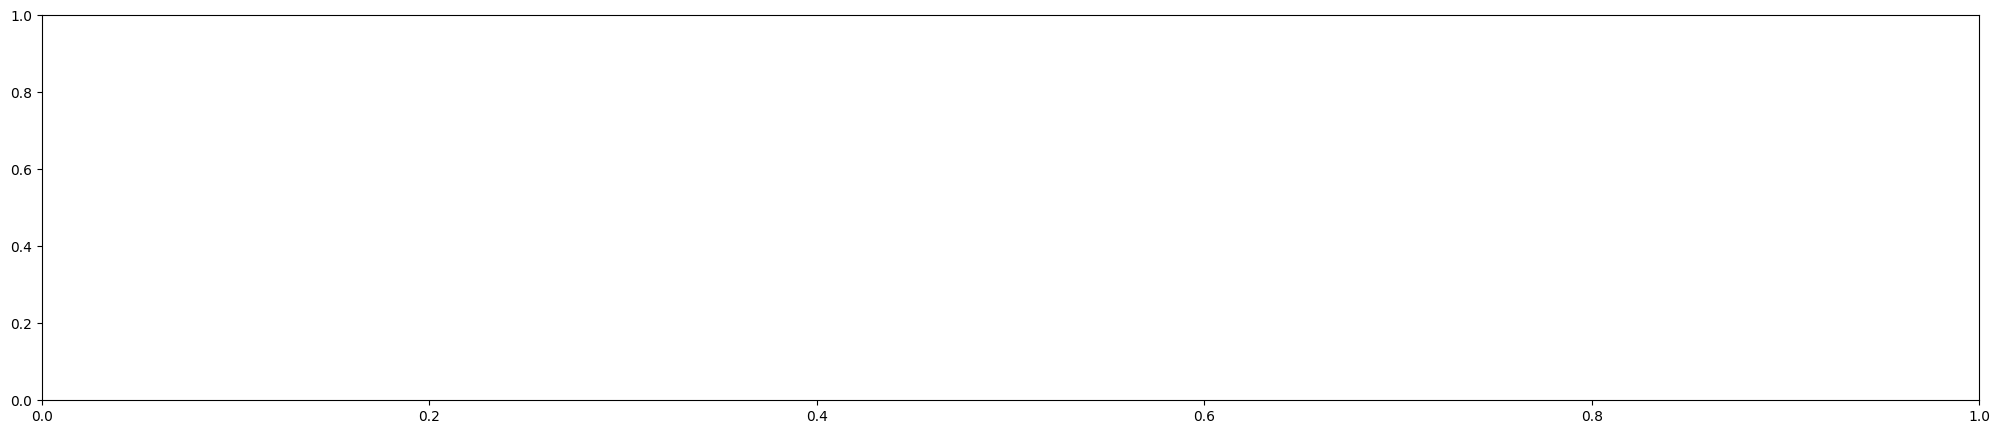

In [113]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Level'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i-10],np.ones(np.size(df['Level'][i-12:i-10]))*np.mean(df['Level'][i-12:i-10]),color='green', linewidth=1)
    plt.plot(df['Date'][i-10:i-8],np.ones(np.size(df['Level'][i-10:i-8]))*np.mean(df['Level'][i-10:i-8]),color='green', linewidth=1)
    plt.plot(df['Date'][i-8:i-2],np.ones(np.size(df['Level'][i-8:i-2]))*np.mean(df['Level'][i-8:i-2]),color='green', linewidth=1)
    plt.plot(df['Date'][i-2:i],np.ones(np.size(df['Level'][i-2:i]))*np.mean(df['Level'][i-2:i]),color='green', linewidth=1)
    plt.plot(df['Date'][i],df['Level'][i],color='green', marker=1, markersize=10)

x = []
y = []
for i in range(12,np.size(df['Date']),12):
    #x.append(df['Date'][i-11])
    #x.append(df['Date'][i-9])
    #x.append(df['Date'][i-5])
    #x.append(df['Date'][i-1])
    #x.append(df['Date'][i])
    x.append(i-11)
    x.append(i-9)
    x.append(i-5)
    x.append(i-1)
    x.append(i)
    y.append(np.mean(df['Level'][i-12:i-10])) 
    y.append(np.mean(df['Level'][i-10:i-8])) 
    y.append(np.mean(df['Level'][i-8:i-2])) 
    y.append(np.mean(df['Level'][i-2:i-1])) 
    y.append(df['Level'][i]) 

    plt.plot(df['Date'][i-11],np.mean(df['Level'][i-12:i-10]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-9],np.mean(df['Level'][i-10:i-8]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-5],np.mean(df['Level'][i-8:i-2]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-1],np.mean(df['Level'][i-2:i-1]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i],df['Level'][i],color='red', marker=1, markersize=10)

def objective(x, a, b, c, d, e, f):
    return (a*0 + e*x*0) * np.sin(b*x+c) + d +f*x

import scipy
# fit curve
popt, _ = scipy.optimize.curve_fit(objective, x, y)
print(popt)

# unpack optima parameters for the objective function
a, b, c, d, e, f = popt

y_new = []
# use optimal parameters to calculate new values
for j in range(np.size(x)):
    y_new.append( objective(x[j], a*2, b, c, d, e, f) ) 

plt.plot(df['Date'][x],y_new,color='black', linewidth=1)


new_date = pd.read_excel('Date.xlsx')
new_date = new_date.Date
new_x = []
pos = []
# use optimal parameters to calculate new values
for j in range(192,180+np.size(new_date),12):
    pos.append(j-11-180)
    pos.append(j-9-180)
    pos.append(j-5-180)
    pos.append(j-1-180)
    pos.append(j-180)
    new_x.append(j-11)
    new_x.append(j-9)
    new_x.append(j-5)
    new_x.append(j-1)
    new_x.append(j)
    
y_NEW = []
for j in range(np.size(new_x)):
    y_NEW.append( objective(new_x[j], a*2, b, c, d, e, f) ) 

# plt.plot(pd.to_datetime(new_date[pos]),y_NEW,color='black', linewidth=1)


In [109]:
y_new[0], y_new[-1], (y_new[-1]-y_new[0])/(2023/2008)/1.4

(1.4388394239639302, 0.6333974176569526, -0.5710499077270006)

In [ ]:
#4) BORETTO ------------------------
#Import csv datas 
data4_boretto = pd.read_csv('boretto.csv',sep=';',low_memory=False)
#Remove undesired columns
data4_boretto.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data4_boretto.rename(columns={'Boretto - Livello Idrometrico - 14017 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN
data4_boretto.dropna(inplace=True)
data4_boretto = data4_boretto.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data4_boretto.describe()
#In case it gives error because of non numerical data
data4_boretto['Level'] = pd.to_numeric(data4_boretto['Level'], errors='coerce')

#There is a weird data, completely out of scale
data4_boretto = data4_boretto[ data4_boretto['Level']< 5000]

#Remove outliers
mean=np.mean(data4_boretto['Level'])
sigma = np.std(data4_boretto['Level'])
#Remove rows with z-score greater than 3
data4_boretto = data4_boretto[ data4_boretto['Level']< mean+3*sigma]
#Now for smaller extremes
data4_boretto = data4_boretto[ data4_boretto['Level']> mean-3*sigma]

#Obtain the delta Level-Mean
data4_boretto['Delta'] = data4_boretto['Level']-mean
De=data4_boretto['Delta']
De = De.reset_index(drop=True)

#Rename the time
data4_boretto['Orario'] = pd.to_datetime(data4_boretto['Orario'])

#Plot result
plt.subplots(figsize=(25, 5))
plt.plot(data4_boretto['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Boretto(4)')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


#Make a monthly avarage
monthly_avg4= data4_boretto.groupby(pd.Grouper(key='Orario', freq='M')).mean(numeric_only=True)

plt.subplots(figsize=(20, 5))
plt.plot(monthly_avg1['Delta'])
plt.title('Monthly variation of Po River Level @Boretto(4)')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)

monthly_avg1['Date']=['{}-{}'.format(i.year,i.month) for i in monthly_avg1.index.tolist()]

#Actually plotting the barplot
plt.subplots(figsize=(20, 5))
plt.bar(monthly_avg1['Date'],monthly_avg1['Delta'], color=colors)
plt.title('Monthly variation of Po River Level @Boretto(4)')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x',color='gray', linestyle='--', linewidth=0.5)

plt.xticks(date_range)

In [ ]:
#5) CASTELMASSA ---------------------
#Import csv datas 
data5_castelmassa = pd.read_csv('Castelmassa.csv',sep=';',low_memory=False)
#Remove undesired columns
data5_castelmassa.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data5_castelmassa.rename(columns={'Castelmassa SIAP - Livello Idrometrico - 15968 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN
data5_castelmassa.dropna(inplace=True)
data5_castelmassa = data5_castelmassa.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data5_castelmassa.describe()
#In case it gives error because of non numerical data
data5_castelmassa['Level'] = pd.to_numeric(data5_castelmassa['Level'], errors='coerce')

#Remove outliers
mean=np.mean(data5_castelmassa['Level'])
sigma = np.std(data5_castelmassa['Level'])
#Remove rows with z-score greater than 3
data5_castelmassa = data5_castelmassa[ data5_castelmassa['Level']< mean+3*sigma]
#2121 vales are removed for castelmassa (original 131301)
#Now for smaller extremes
data5_castelmassa = data5_castelmassa[ data5_castelmassa['Level']> mean-3*sigma]
#no lower extremes removed for castelmassa

#Obtain the delta Level-Mean
data5_castelmassa['Delta'] = data5_castelmassa['Level']-mean
De=data5_castelmassa['Delta']
De = De.reset_index(drop=True)

#Rename the time
data5_castelmassa['Orario'] = pd.to_datetime(data5_castelmassa['Orario'])

#Plot result

plt.subplots(figsize=(25, 5))
plt.plot(data5_castelmassa['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Castelmassa(5) ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


#Make a monthly avarage
monthly_avg5 = data5_castelmassa.groupby(pd.Grouper(key='Orario', freq='M')).mean(numeric_only=True)

plt.subplots(figsize=(20, 5))
plt.plot(monthly_avg5['Delta'])
plt.title('Monthly variation of Po River Level @Castelmassa(5) ')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)

#BARPLOT

monthly_avg5['Date']=['{}-{}'.format(i.year,i.month) for i in monthly_avg5.index.tolist()]

#Actually plotting the barplot
plt.subplots(figsize=(20, 5))
plt.bar(monthly_avg5['Date'],monthly_avg5['Delta'], color=colors)
plt.title('Monthly variation of Po River Level @Castelmassa(5) ')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x',color='gray', linestyle='--', linewidth=0.5)

plt.xticks(date_range)

([<matplotlib.axis.XTick at 0x14500cfba00>,
 [Text(0.0, 0, '2008-1'),
  Text(12.0, 0, '2009-1'),
  Text(24.0, 0, '2010-1'),
  Text(36.0, 0, '2011-1'),
  Text(48.0, 0, '2012-1'),
  Text(60.0, 0, '2013-1'),
  Text(72.0, 0, '2014-1'),
  Text(84.0, 0, '2015-1'),
  Text(96.0, 0, '2016-1'),
  Text(108.0, 0, '2017-1'),
  Text(120.0, 0, '2018-1'),
  Text(132.0, 0, '2019-1'),
  Text(144.0, 0, '2020-1'),
  Text(156.0, 0, '2021-1'),
  Text(168.0, 0, '2022-1'),
  Text(180.0, 0, '2023-1')])

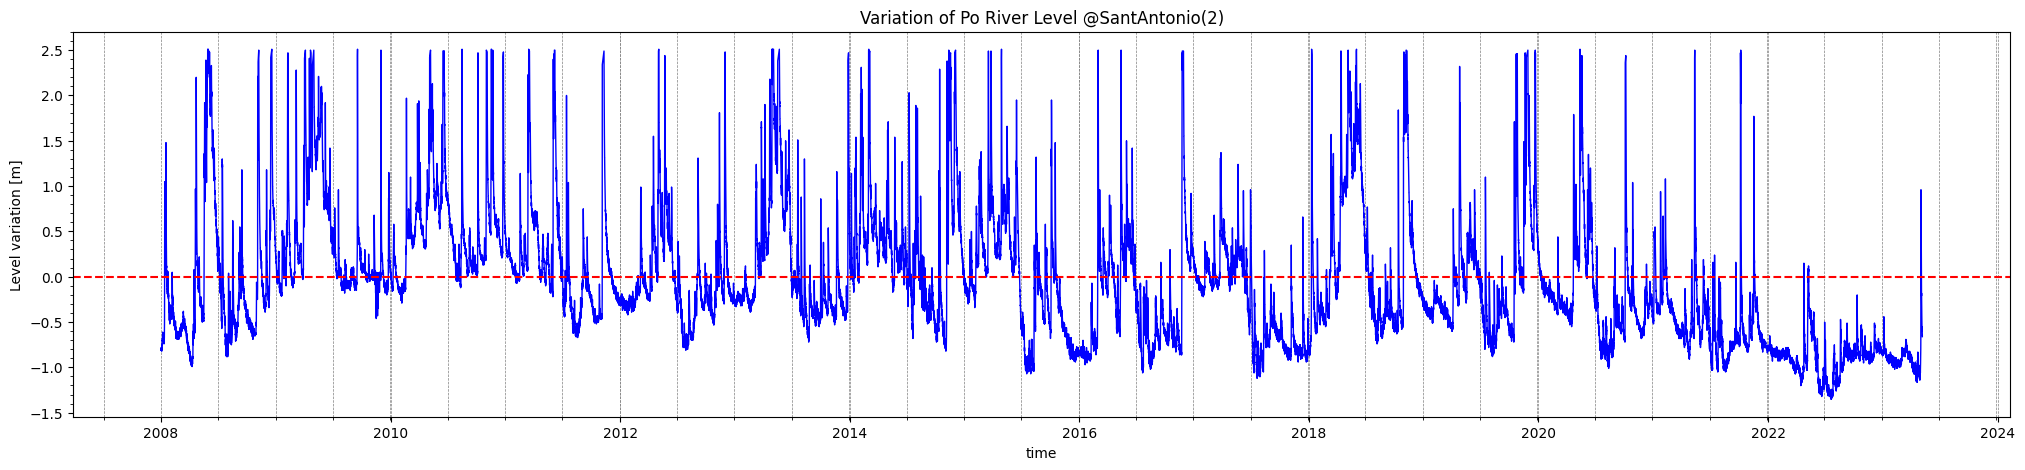

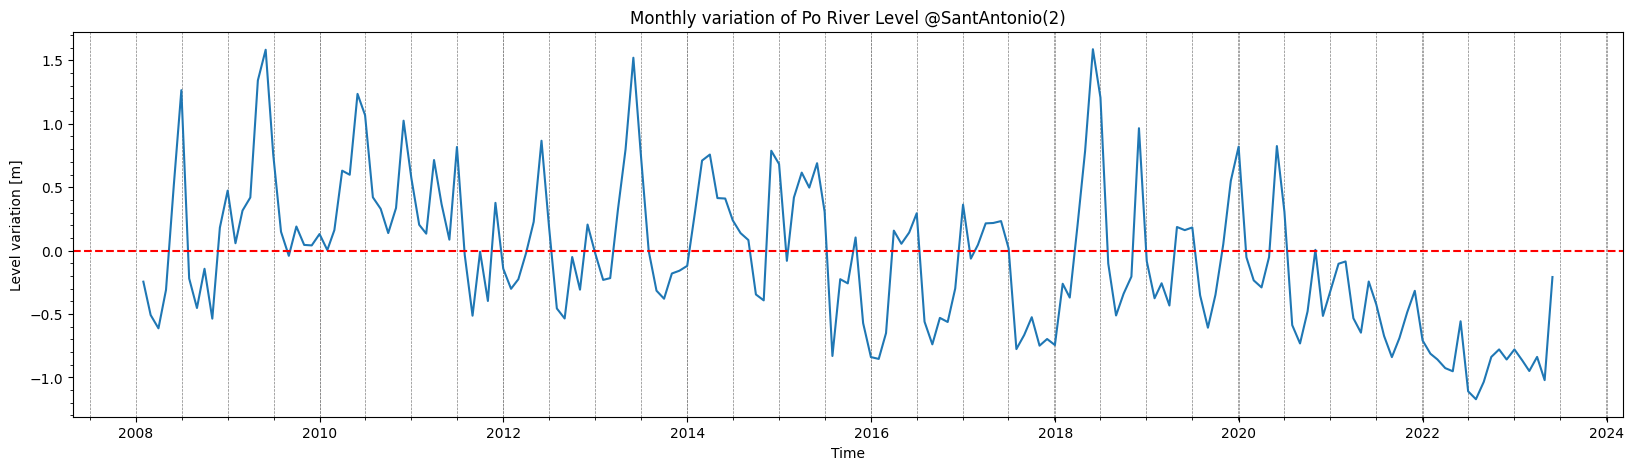

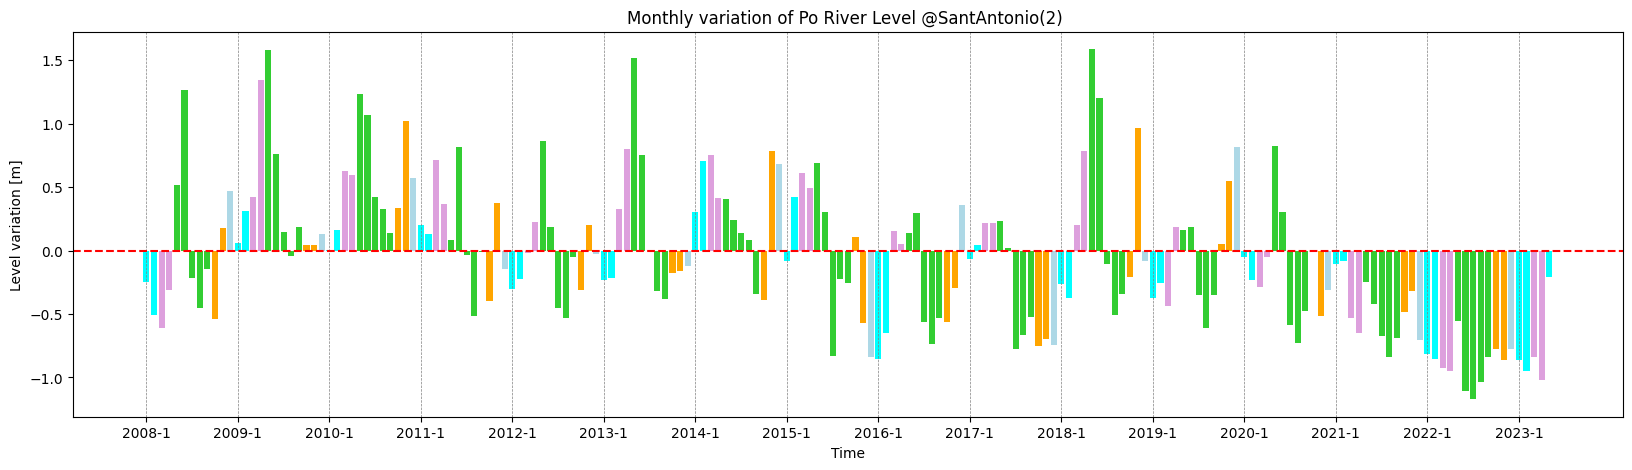

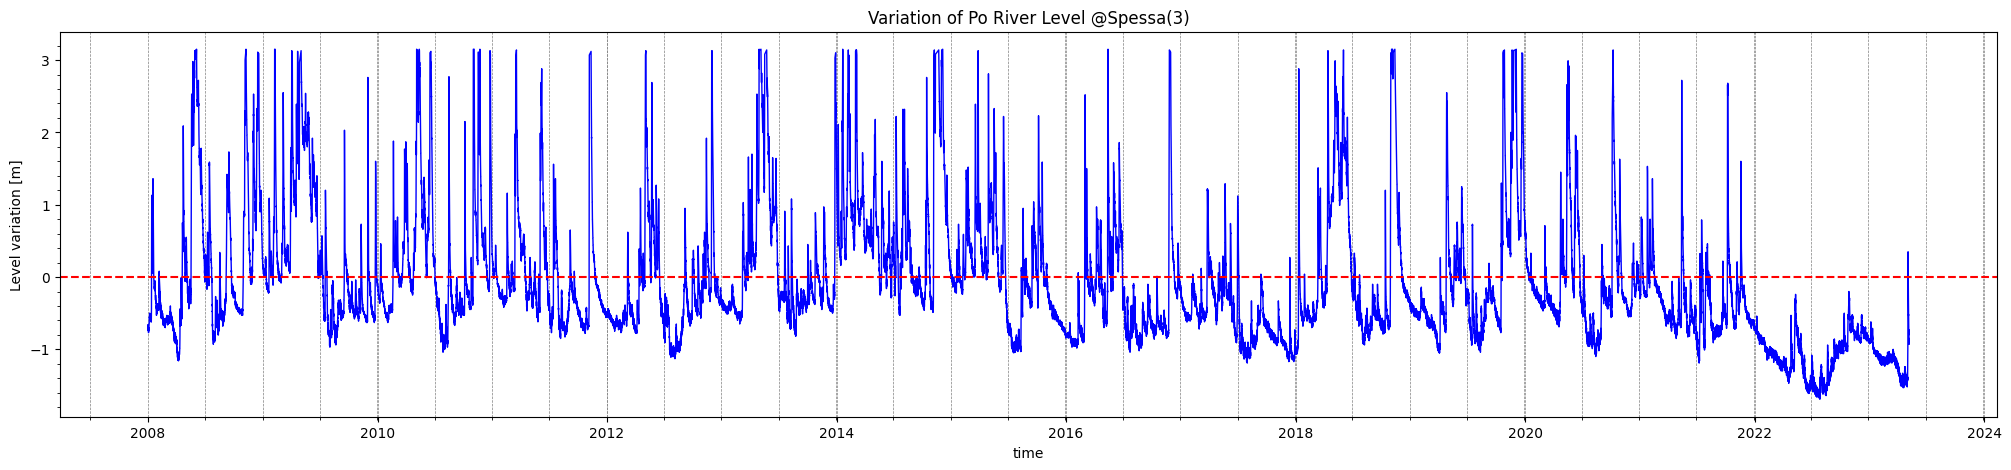

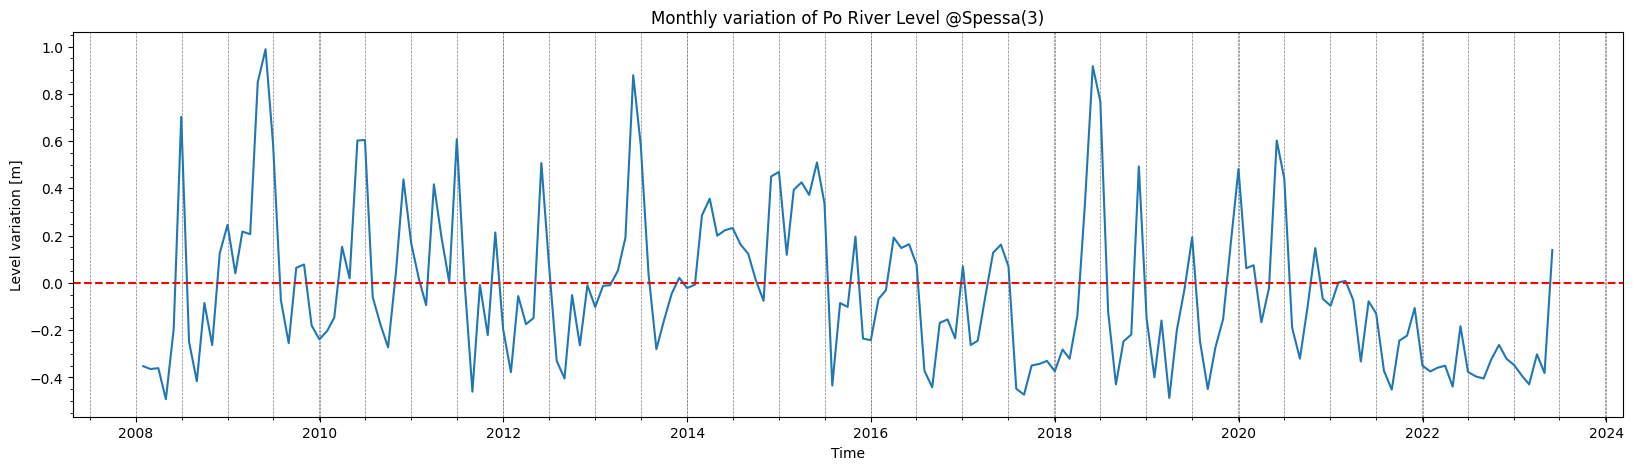

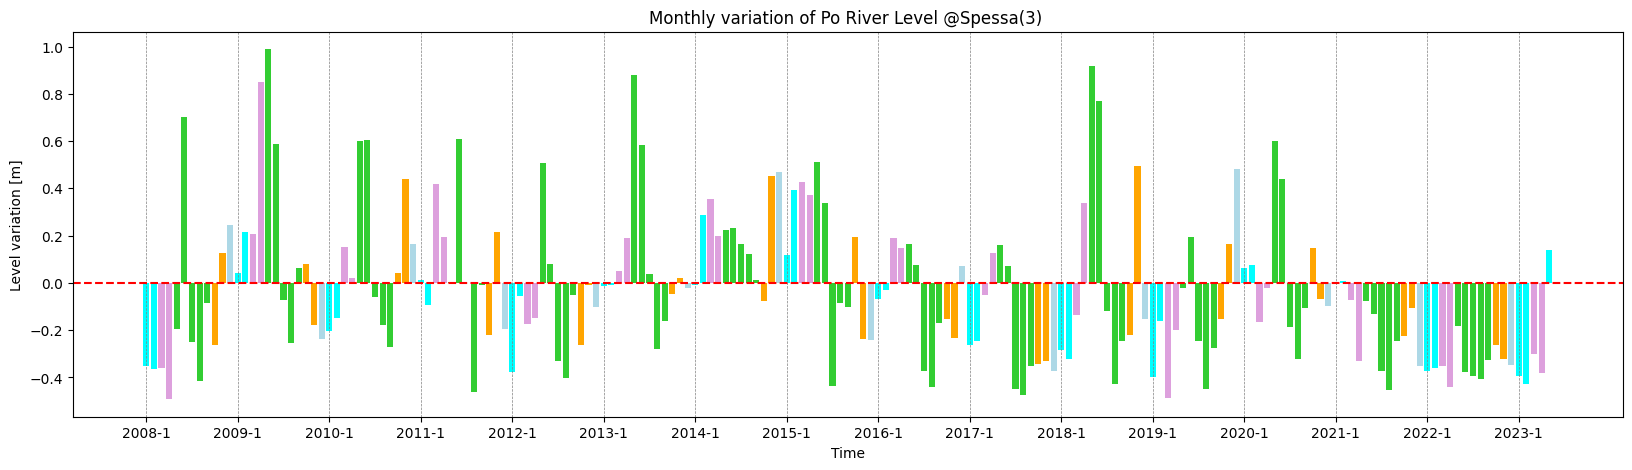

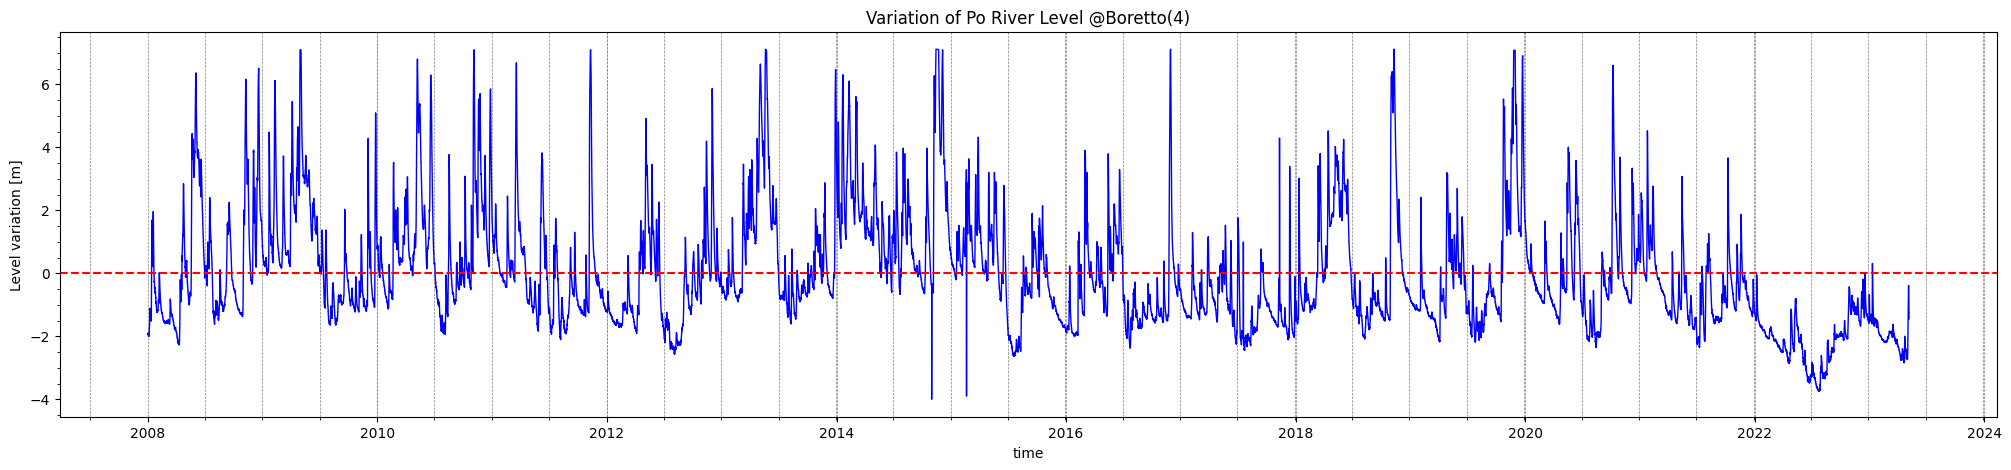

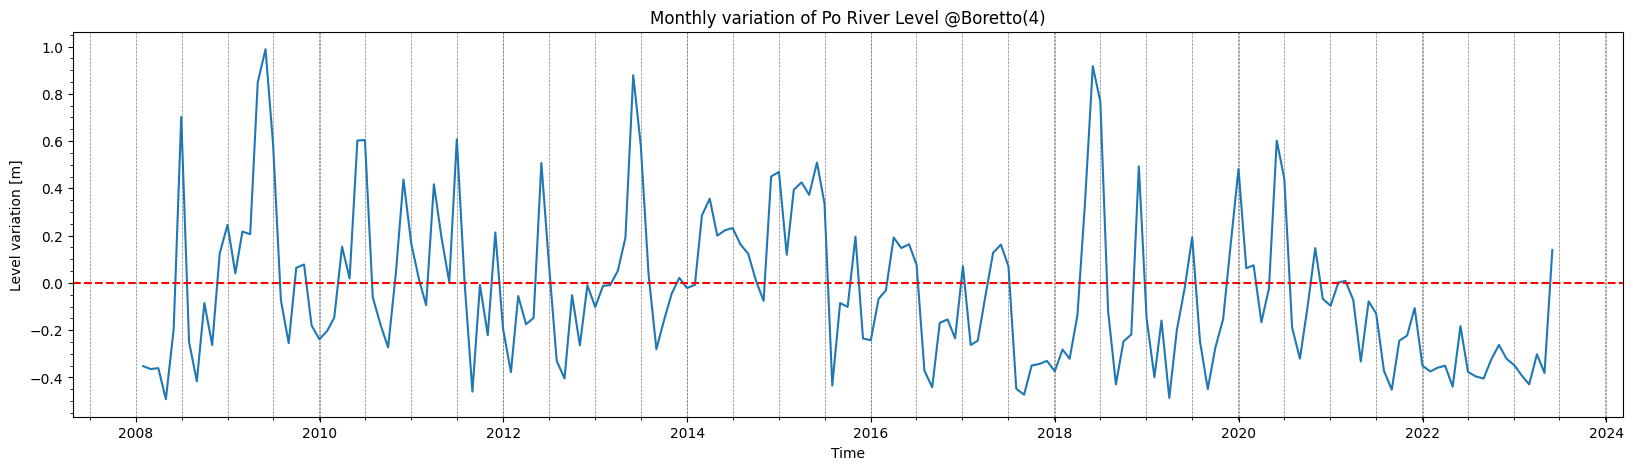

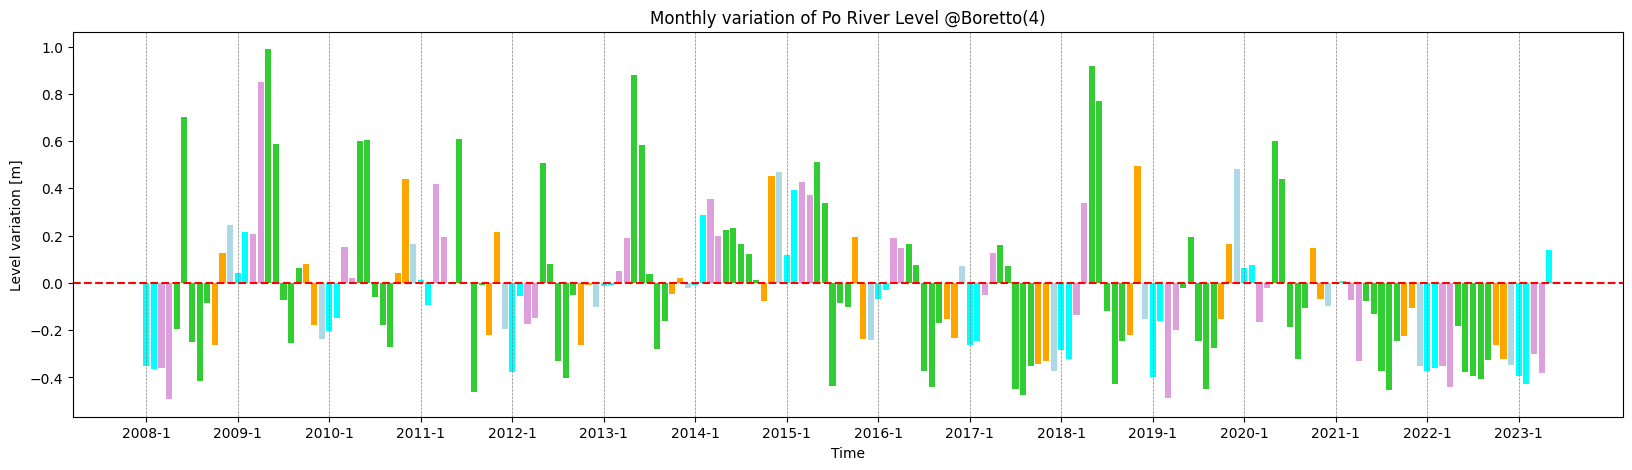

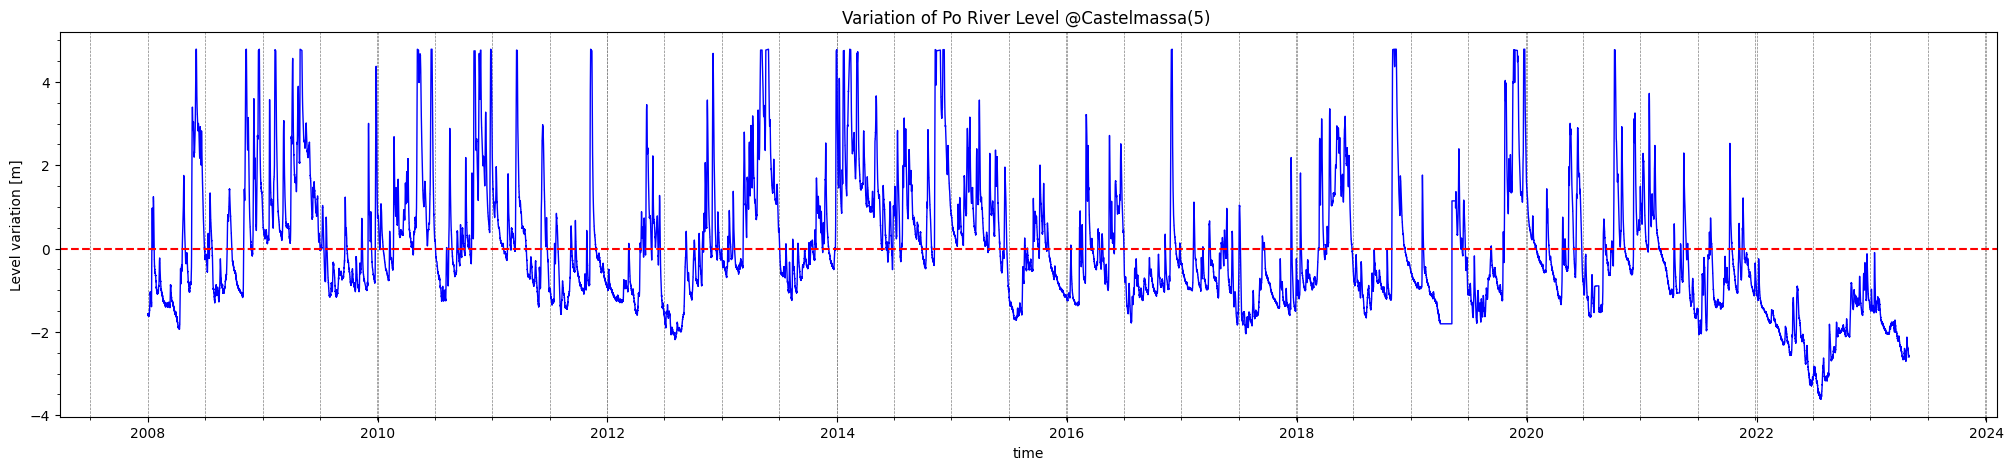

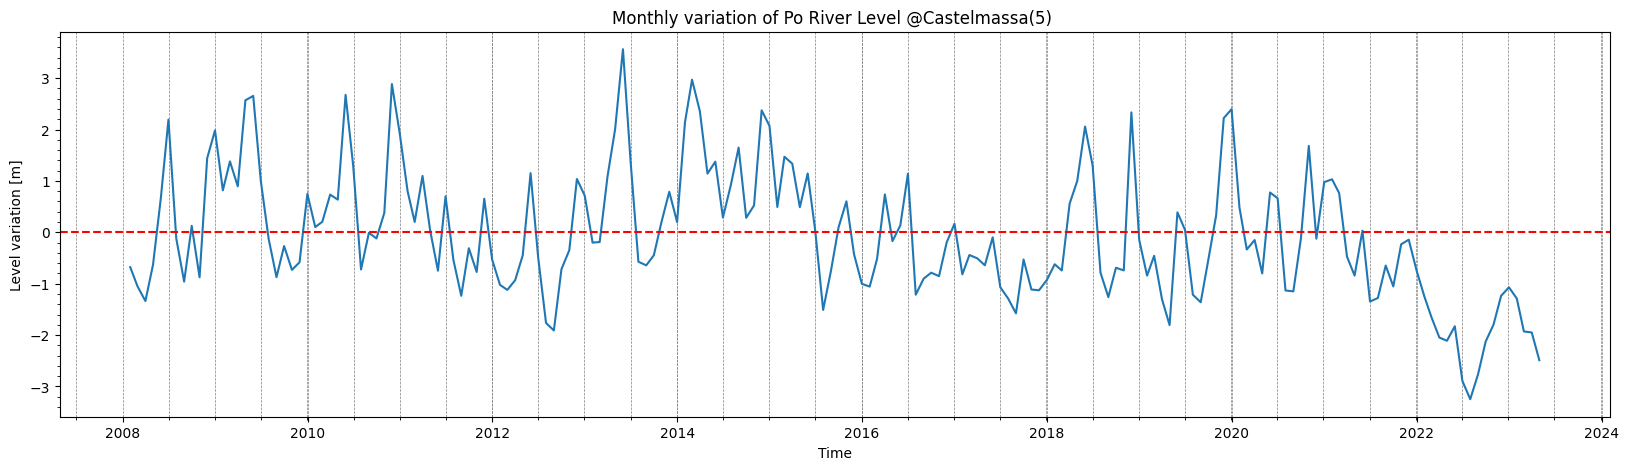

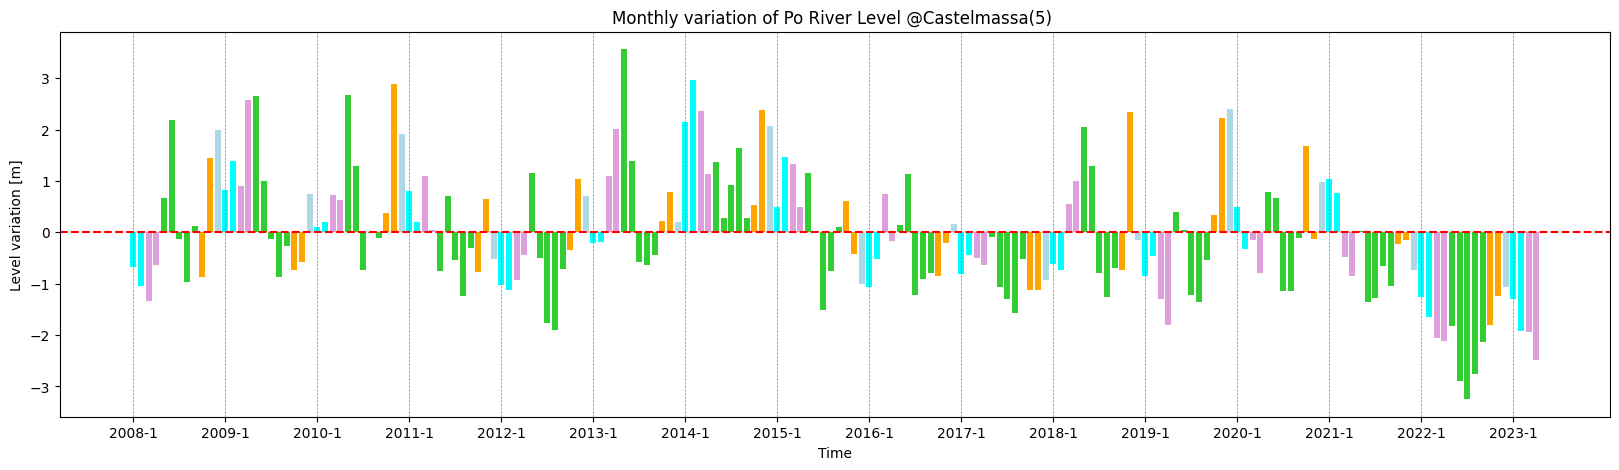

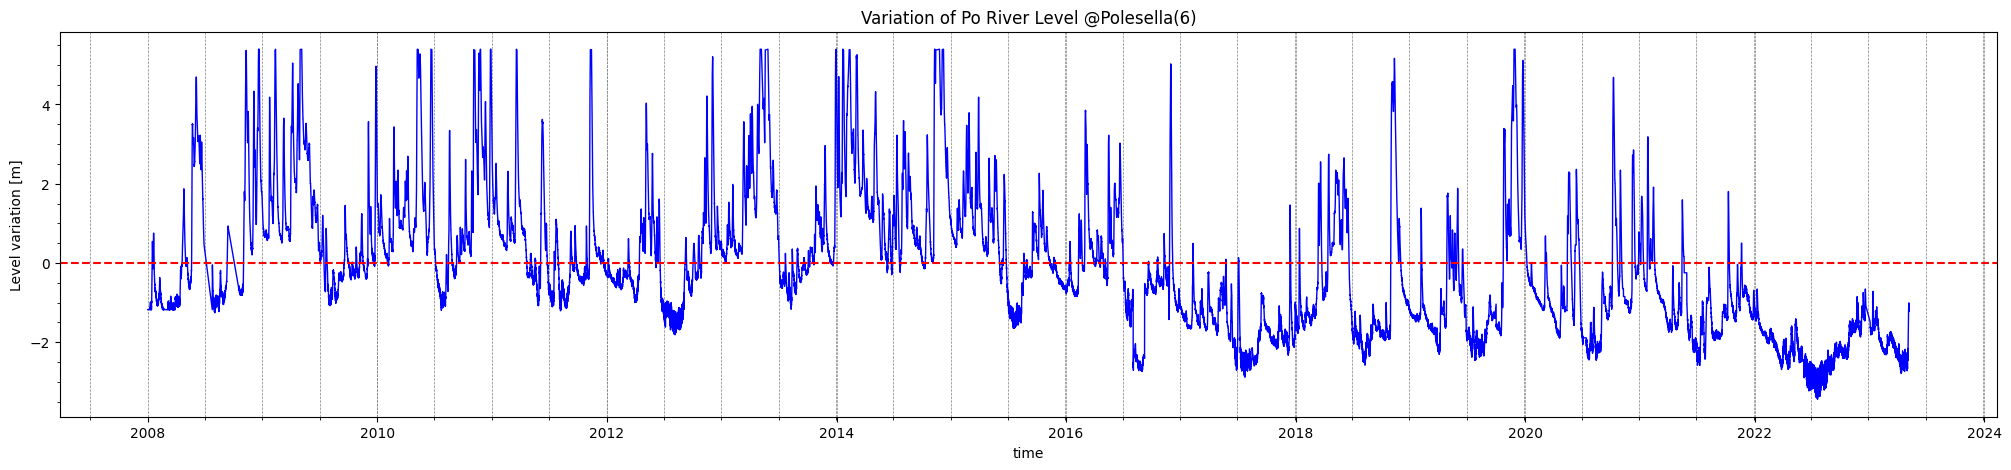

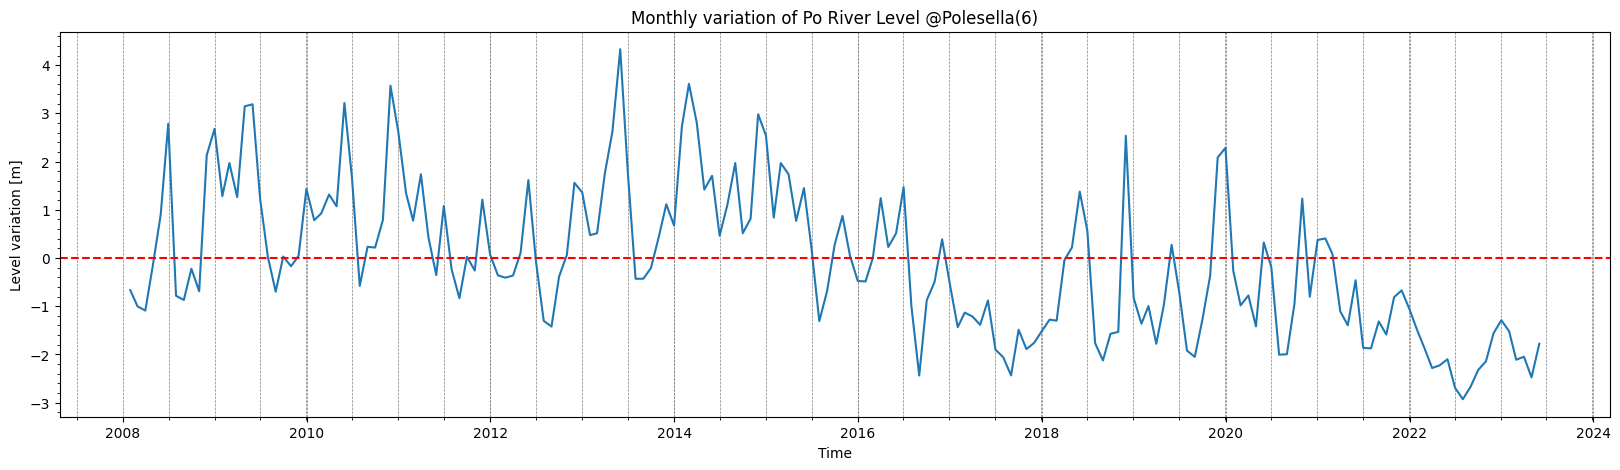

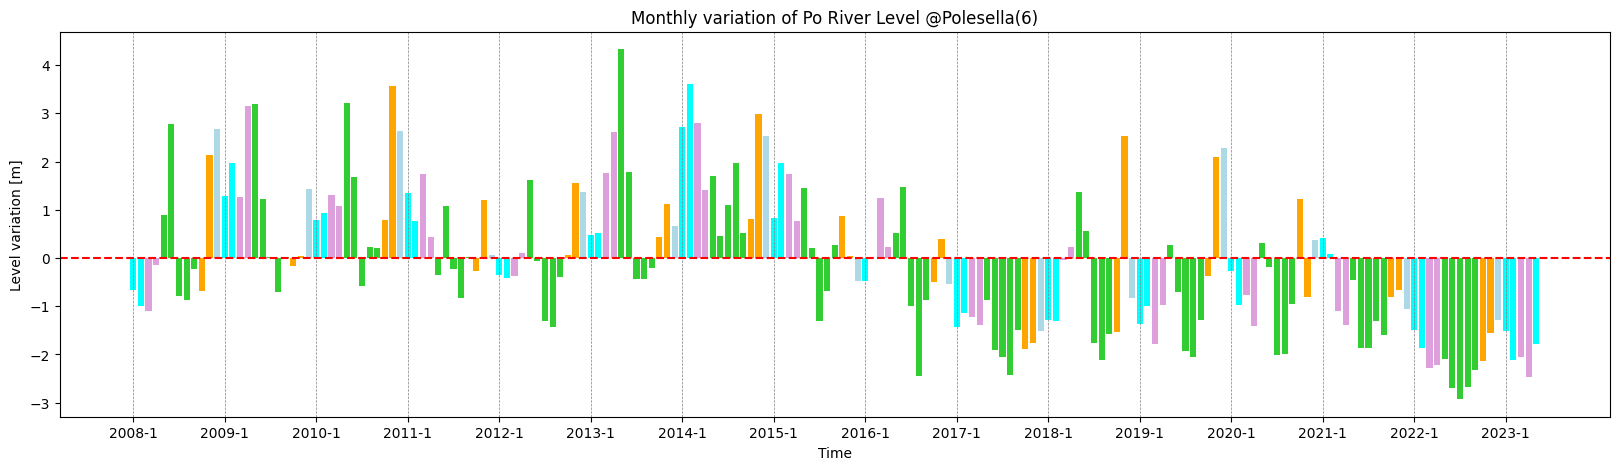

In [92]:
#6) POLESELLA ---------------
#Import csv datas 
data6_polesella = pd.read_csv('polesella.csv',sep=';',low_memory=False)
#Remove undesired columns
data6_polesella.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data6_polesella.rename(columns={'Polesella SIAP - Livello Idrometrico - 15980 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN
data6_polesella.dropna(inplace=True)
data6_polesella = data6_polesella.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data6_polesella.describe()
#In case it gives error because of non numerical data
data6_polesella['Level'] = pd.to_numeric(data6_polesella['Level'], errors='coerce')


#Remove outliers
mean=np.mean(data6_polesella['Level'])
sigma = np.std(data6_polesella['Level'])
#Remove rows with z-score greater than 3
data6_polesella = data6_polesella[ data6_polesella['Level']< mean+3*sigma]
#Now for smaller extremes
data6_polesella = data6_polesella[ data6_polesella['Level']> mean-3*sigma]

#Obtain the delta Level-Mean
data6_polesella['Delta'] = data6_polesella['Level']-mean
De=data6_polesella['Delta']
De = De.reset_index(drop=True)

#Rename the time
data6_polesella['Orario'] = pd.to_datetime(data6_polesella['Orario'])

#Plot result
plt.subplots(figsize=(25, 5))
plt.plot(data6_polesella['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Polesella(6)')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


#Make a monthly avarage
monthly_avg6= data6_polesella.groupby(pd.Grouper(key='Orario', freq='M')).mean(numeric_only=True)

plt.subplots(figsize=(20, 5))
plt.plot(monthly_avg6['Delta'])
plt.title('Monthly variation of Po River Level @Polesella(6)')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)

monthly_avg6['Date']=['{}-{}'.format(i.year,i.month) for i in monthly_avg6.index.tolist()]

#Actually plotting the barplot
plt.subplots(figsize=(20, 5))
plt.bar(monthly_avg6['Date'],monthly_avg6['Delta'], color=colors)
plt.title('Monthly variation of Po River Level @Polesella(6)')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x',color='gray', linestyle='--', linewidth=0.5)

plt.xticks(date_range)